## Similarities in Dynamical Systems of Human Brain Resting States Inferred from Human Connectome Project MEG Data

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/baes4/RestingStateMEG_HCP/master)

Here, we demonstrate the similarities between inferred human brain resting state networks across various patients found in the Human Connectome Project (HCP) MEG2 data release. 

Resting state connectivities between MEG channels in sensor space are inferred and further analyzed to discover any commonalities between groups of patients found in the HCP database. 

The necessary packages are first imported to the Jupyter notebook **below:**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import linregress
%matplotlib inline

### Importing the Inference Code
The **main** function for the inference script is also imported to the notebook, which works to generate all the connectivities and time shift covariances between channels for every given patient in the HCP database. 

Entry i, j **connectivities (W) matrix** can be thought of as weights describing the effect that the ith channel has on jth channel of the MEG machine used to record data. 

Entry i, j in the **time shift covariances matrix**  can be thought of as the covariance between the ith channel and the jth channel at a given timeshift. This given timeshift is unitless, and depends on the sampling frequency given by the MEG recording. 

In [2]:
import RestingStateMEG_HCP_Inference

### Setting the parameters for running the script
We must first set the parameters for the script, which includes the list of identifiers for the specific patients within the HCP database that we would like to analyze, the number of PCA components (principal MEG channels) used for the inference, and the size of the time shift for the generation of time shift covariances between the MEG channels. 

Below, all 88 patients' identifiers are listed for processing

In [3]:
power = 3
pca_components = 50
time_shift = 10
dataset_ids = ['100307', '102816', '105923', '106521', '108323', '109123', '111514', '112920', 
               '116524', '116726', '133019', '140117', '146129', '149741', '153732', '154532', 
               '156334', '158136', '162026', '162935', '164636', '166438', '169040', '172029', 
               '174841', '175237', '175540', '177746', '179245', '181232', '185442', '187547', 
               '189349', '191033', '191437', '191841', '192641', '195041', '198653', '204521', 
               '205119', '212318', '212823', '214524', '221319', '223929', '233326', '248339', 
               '250427', '255639', '257845', '283543', '287248', '293748', '352132', '352738', 
               '353740', '358144', '406836', '433839', '512835', '555348', '559053', '568963', 
               '581450', '599671', '601127', '660951', '662551', '665254', '667056', '679770', 
               '680957', '706040', '707749', '715950', '725751', '735148', '783462', '814649',
               '825048', '872764', '877168', '891667', '898176', '912447', '917255', '990366']

### Important Variables 
We can finally run the main script, which will produce five variables needed for further analysis of the inference on the MEG data

1. allwmatrices
2. allsigs
3. allbiases
4. pca_data_dict

**allwmatrices** contains all the w matrices for the given dataset of patients by the user. **allsigs** and **allbiases** contains the sigma and bias values recovered from the inference function which are needed to simulate data and help to prove the predictive capabilities of the inference function. Lastly **pca_data_dict** is a dictionary that contains the transformed data from the Principal Components Analysis on the original MEG data with patient identifiers as keys. 

In [4]:
allwmatrices, alltscmatrices, allsigs, allbiases, pca_data_dict = RestingStateMEG_HCP_Inference.hcp_inference(dataset_ids, pca_components, time_shift, power)

Running Newest Non-Linear Inference (Updated) with:
1. PCA components = 50
2. Time shifts = 10
3. Power = 3


### Testing the Predictive Power of the Network Inference
After these 4 variables are collected, we can then proceed to plot and analyze the results of the inference on the MEG dataset. To test the predictive capabilities of the W matrix formed from the inference for each patient, we can compare the time shift covariance of the MEG recording (that has already undergone a PCA transformation with the number of components given by the user) with the time shift covariance of a simulated dataset (which is simulated using the same W matrix computed from the MEG recording). 

If the W matrix is predictive, we would expect to see a very high correlation within the plots between the time shift covariance matrices, as this means that the simulated data from the W matrix exhibits very similar time shift relationships between MEG channels as the non-simulated MEG recording

The **red line** in the figures below indicate a direct 1:1 relationship between values of time shift covariances between the original and simulated data. The **blue line** in the figure indicates the actual regression line between the time shift covariances. 

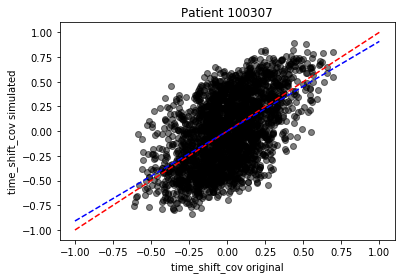

Slope:  0.9085020738713 P-Value:  5.77454322537446e-198
--------------------------------------------------------------


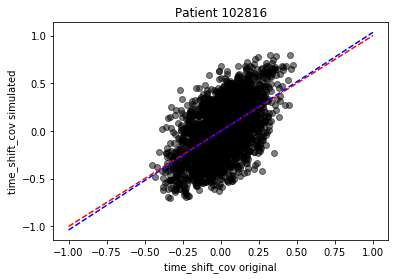

Slope:  1.0359332678750552 P-Value:  4.672927375055415e-194
--------------------------------------------------------------


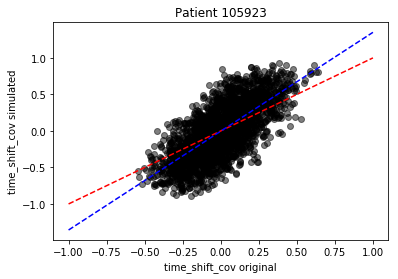

Slope:  1.3534067475926674 P-Value:  0.0
--------------------------------------------------------------


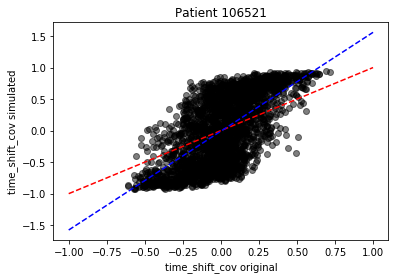

Slope:  1.567548464053723 P-Value:  4.192105054582959e-305
--------------------------------------------------------------


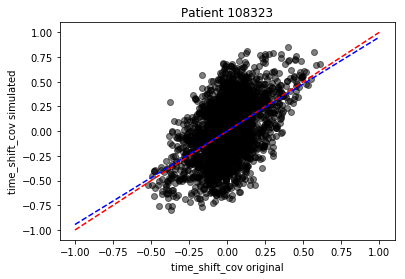

Slope:  0.9480749606999679 P-Value:  2.644852381927821e-152
--------------------------------------------------------------


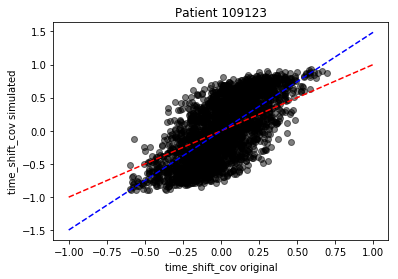

Slope:  1.4913236757910908 P-Value:  0.0
--------------------------------------------------------------


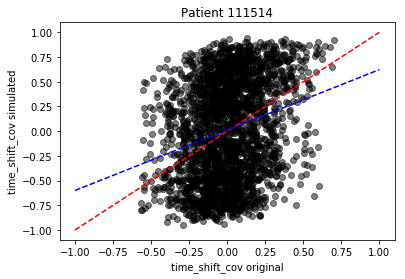

Slope:  0.6114790121845313 P-Value:  6.668104307803941e-39
--------------------------------------------------------------


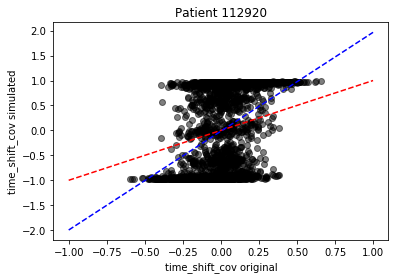

Slope:  1.9817284841287324 P-Value:  1.8778898242683314e-105
--------------------------------------------------------------


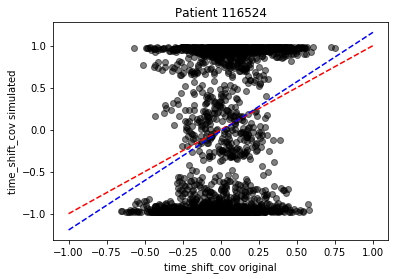

Slope:  1.1763720932139419 P-Value:  2.0961337862205327e-49
--------------------------------------------------------------


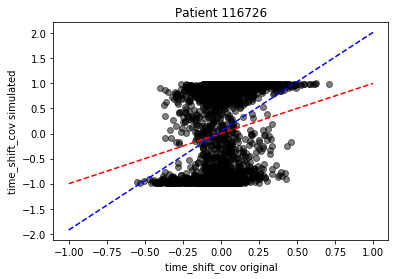

Slope:  1.9703386161615222 P-Value:  2.452384817231947e-86
--------------------------------------------------------------


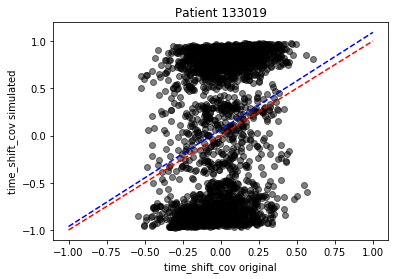

Slope:  1.0272554287010154 P-Value:  2.241149324580392e-38
--------------------------------------------------------------


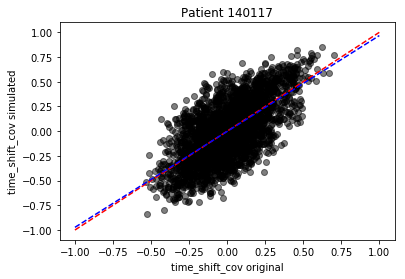

Slope:  0.9700065209497462 P-Value:  1.8533721527e-313
--------------------------------------------------------------


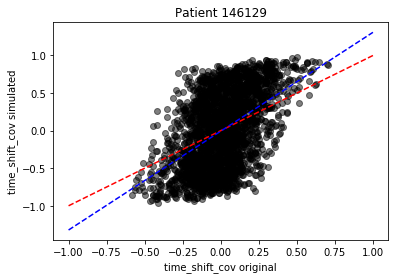

Slope:  1.3152207081642286 P-Value:  3.791962695658615e-161
--------------------------------------------------------------


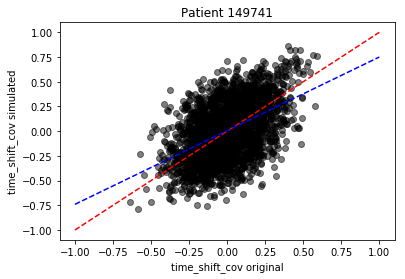

Slope:  0.7452015262947941 P-Value:  3.138346090366456e-150
--------------------------------------------------------------


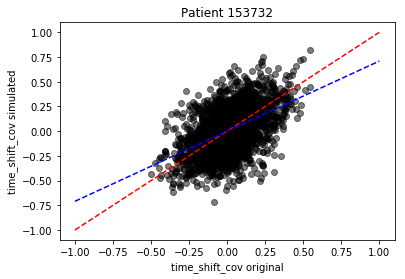

Slope:  0.7093615512910062 P-Value:  2.6974606041968845e-145
--------------------------------------------------------------


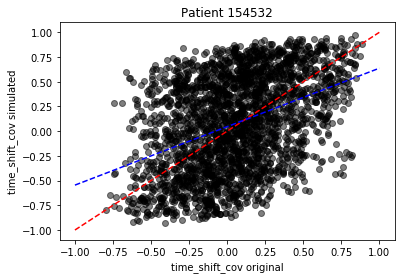

Slope:  0.5913559970900173 P-Value:  5.4473206183349586e-104
--------------------------------------------------------------


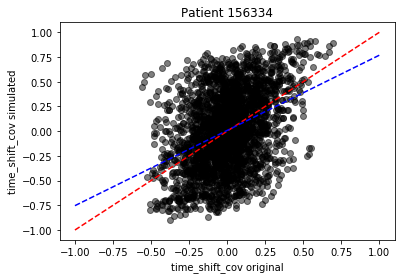

Slope:  0.7611509599298432 P-Value:  2.3399233773765524e-89
--------------------------------------------------------------


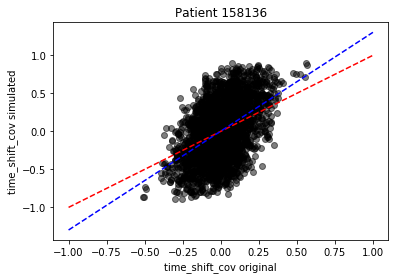

Slope:  1.29989434260691 P-Value:  4.120117146382472e-153
--------------------------------------------------------------


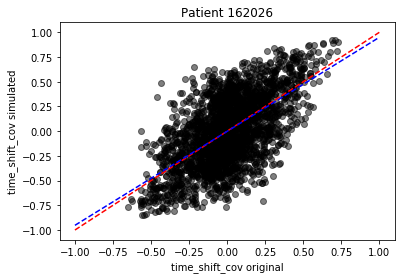

Slope:  0.9510291205182205 P-Value:  2.685369461827804e-255
--------------------------------------------------------------


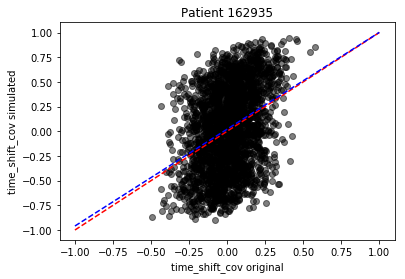

Slope:  0.9805671694233501 P-Value:  4.101037877594309e-75
--------------------------------------------------------------


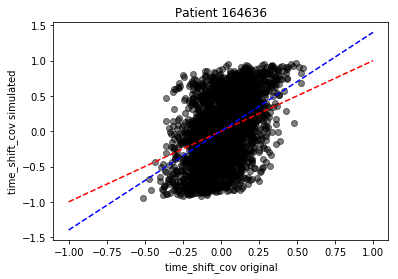

Slope:  1.4000123989941238 P-Value:  8.095965878926804e-136
--------------------------------------------------------------


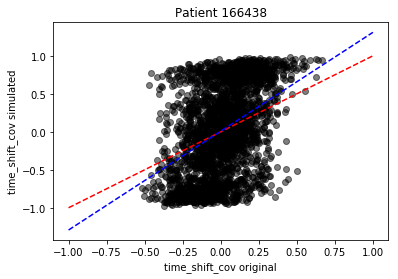

Slope:  1.3007885440538463 P-Value:  3.007713422985424e-106
--------------------------------------------------------------


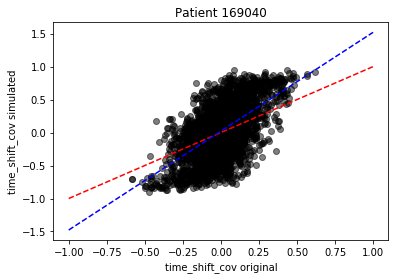

Slope:  1.4985939753934565 P-Value:  1.0121227657689503e-240
--------------------------------------------------------------


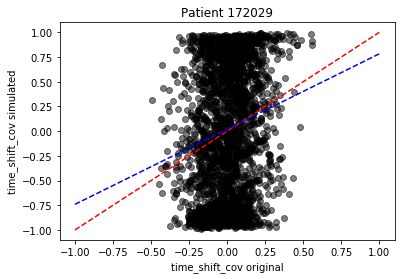

Slope:  0.761565517862796 P-Value:  4.192773941206866e-18
--------------------------------------------------------------


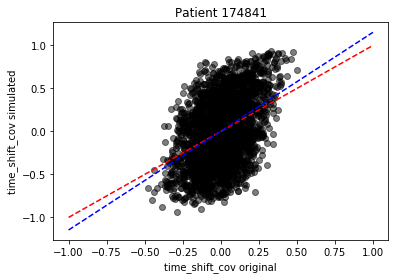

Slope:  1.1493104751087067 P-Value:  7.81870343514859e-127
--------------------------------------------------------------


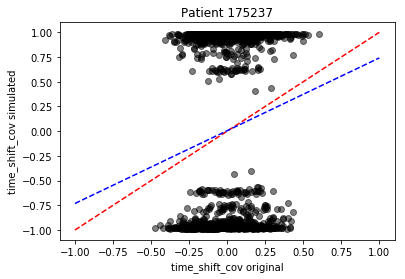

Slope:  0.7362376763570018 P-Value:  2.9440546002004418e-09
--------------------------------------------------------------


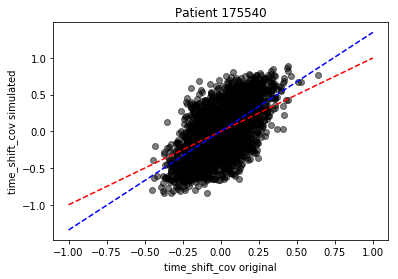

Slope:  1.3461750822627898 P-Value:  2.4387876879984055e-251
--------------------------------------------------------------


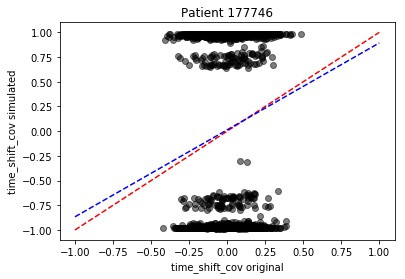

Slope:  0.879756346581739 P-Value:  2.2308602111695825e-10
--------------------------------------------------------------


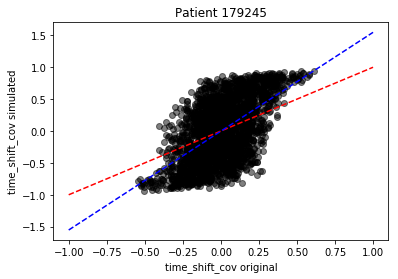

Slope:  1.5500798627227161 P-Value:  1.0416275680614459e-221
--------------------------------------------------------------


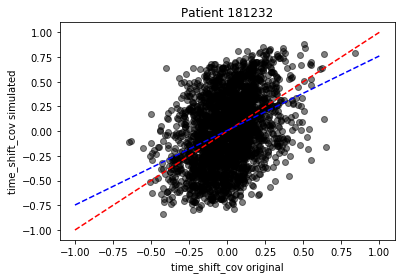

Slope:  0.754148432905594 P-Value:  5.686869736043616e-85
--------------------------------------------------------------


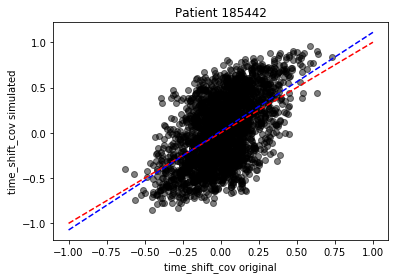

Slope:  1.091245803890705 P-Value:  3.5921133279363166e-197
--------------------------------------------------------------


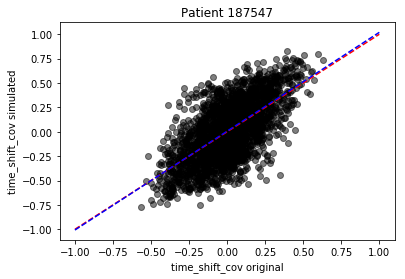

Slope:  1.0137364312455628 P-Value:  1.4060399316520168e-295
--------------------------------------------------------------


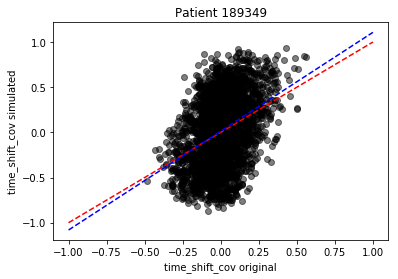

Slope:  1.093994286144667 P-Value:  2.4228449501591e-97
--------------------------------------------------------------


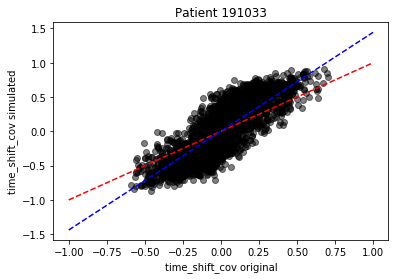

Slope:  1.4408681099961034 P-Value:  0.0
--------------------------------------------------------------


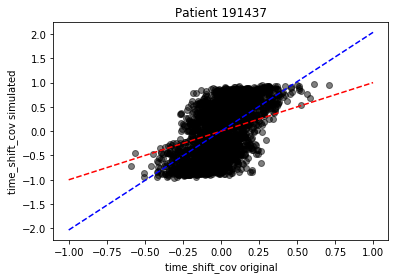

Slope:  2.0340564831426335 P-Value:  2.3678751185498136e-242
--------------------------------------------------------------


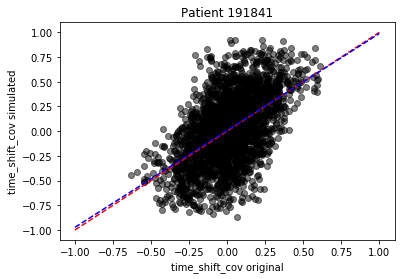

Slope:  0.9803770129572306 P-Value:  8.055831998593541e-178
--------------------------------------------------------------


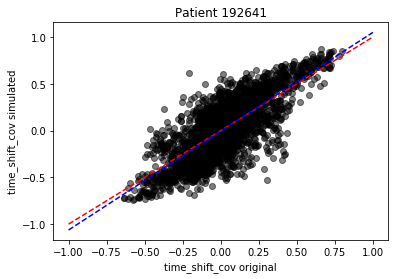

Slope:  1.0563505994890199 P-Value:  0.0
--------------------------------------------------------------


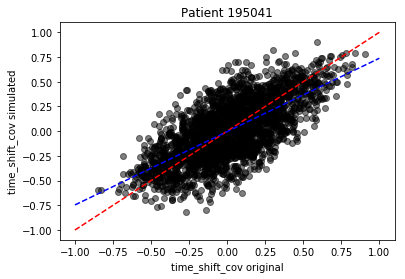

Slope:  0.7420154992515923 P-Value:  0.0
--------------------------------------------------------------


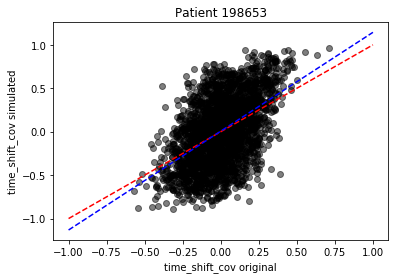

Slope:  1.1379633800515474 P-Value:  1.910765149017353e-165
--------------------------------------------------------------


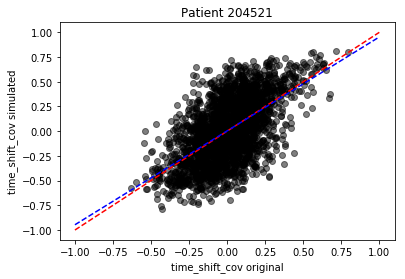

Slope:  0.949949622835896 P-Value:  5.938256462233391e-230
--------------------------------------------------------------


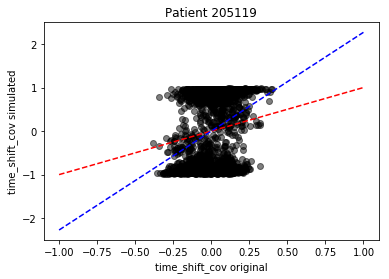

Slope:  2.2702257760978064 P-Value:  1.9037940880477853e-63
--------------------------------------------------------------


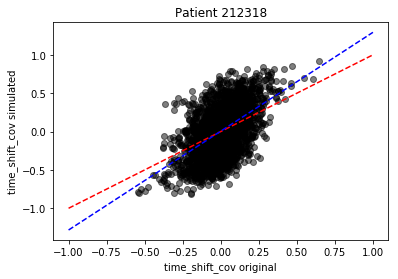

Slope:  1.2883834250542343 P-Value:  5.1932280250474396e-185
--------------------------------------------------------------


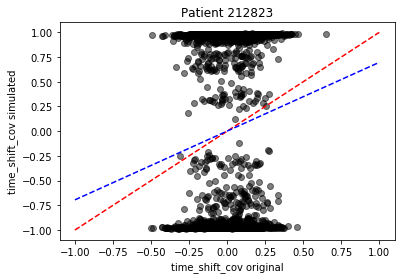

Slope:  0.6956532442615062 P-Value:  6.8294796202208455e-09
--------------------------------------------------------------


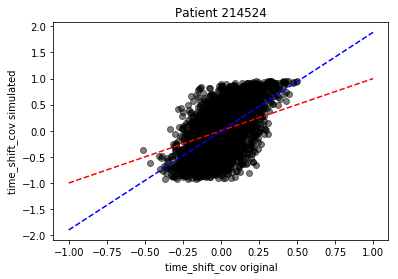

Slope:  1.8927575872016058 P-Value:  5.507043424536993e-238
--------------------------------------------------------------


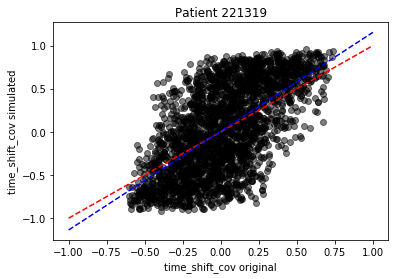

Slope:  1.1450566459579243 P-Value:  3.056814154759568e-280
--------------------------------------------------------------


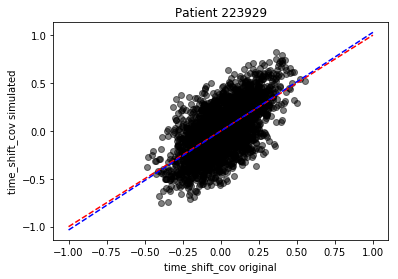

Slope:  1.0320209325827008 P-Value:  3.5506020021516963e-278
--------------------------------------------------------------


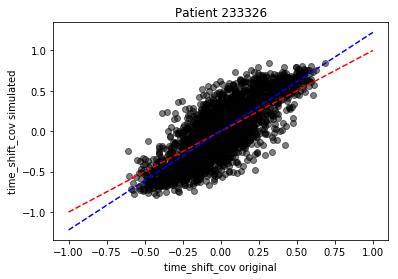

Slope:  1.2225452711299702 P-Value:  0.0
--------------------------------------------------------------


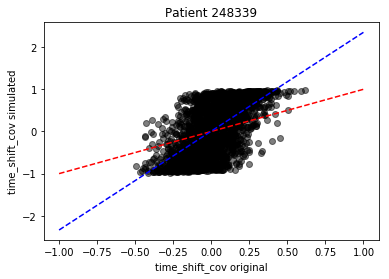

Slope:  2.3440903609156822 P-Value:  4.2216859550175794e-260
--------------------------------------------------------------


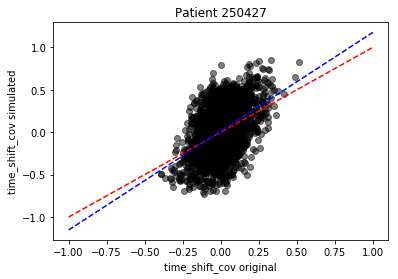

Slope:  1.1645362710400737 P-Value:  3.330593555672173e-132
--------------------------------------------------------------


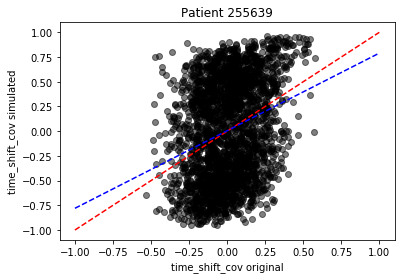

Slope:  0.7850065040637364 P-Value:  1.397622645061608e-46
--------------------------------------------------------------


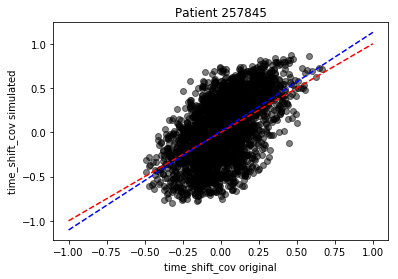

Slope:  1.1163251191971282 P-Value:  2.7737784842021116e-217
--------------------------------------------------------------


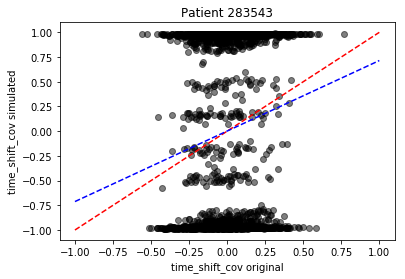

Slope:  0.7133878970129375 P-Value:  3.9223395548222345e-12
--------------------------------------------------------------


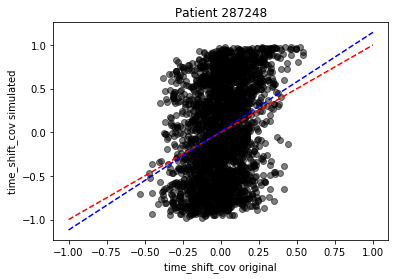

Slope:  1.1326993067166173 P-Value:  1.2414664571567656e-61
--------------------------------------------------------------


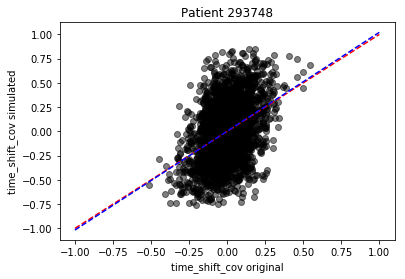

Slope:  1.0192641446284973 P-Value:  1.9732351495173237e-99
--------------------------------------------------------------


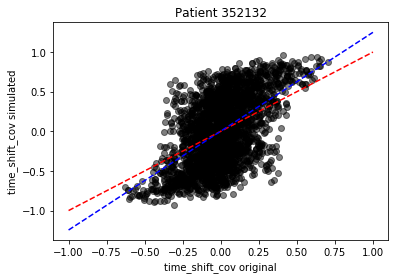

Slope:  1.247111193318073 P-Value:  9.849711451921439e-203
--------------------------------------------------------------


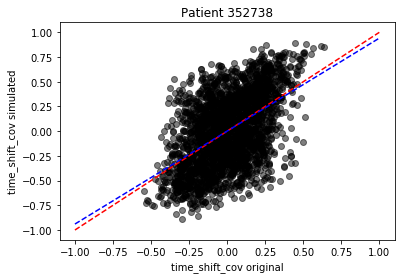

Slope:  0.9404857734282843 P-Value:  1.9871413202752662e-166
--------------------------------------------------------------


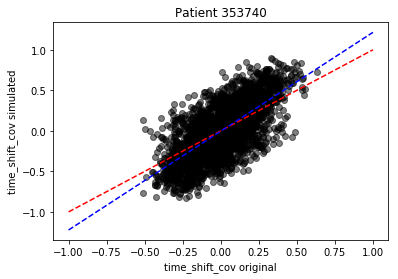

Slope:  1.219386252305486 P-Value:  0.0
--------------------------------------------------------------


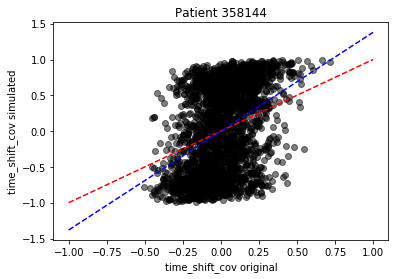

Slope:  1.3804890407248809 P-Value:  8.943552664917555e-101
--------------------------------------------------------------


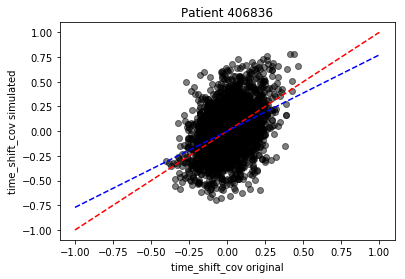

Slope:  0.7714409705784004 P-Value:  4.018358787451599e-91
--------------------------------------------------------------


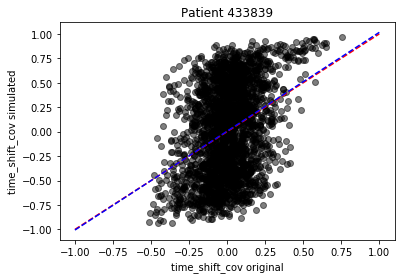

Slope:  1.0110158874627146 P-Value:  3.7790638261578366e-79
--------------------------------------------------------------


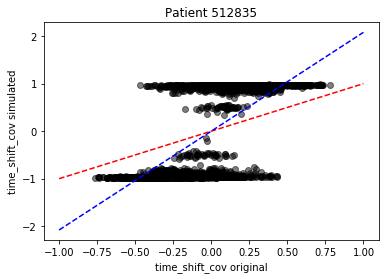

Slope:  2.08013082227255 P-Value:  6.04012648994586e-295
--------------------------------------------------------------


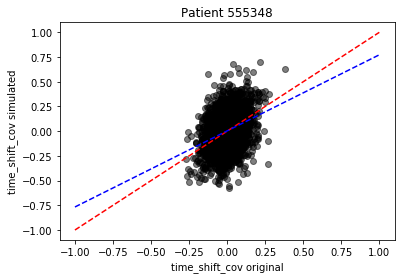

Slope:  0.769841598380751 P-Value:  1.6105194081233854e-62
--------------------------------------------------------------


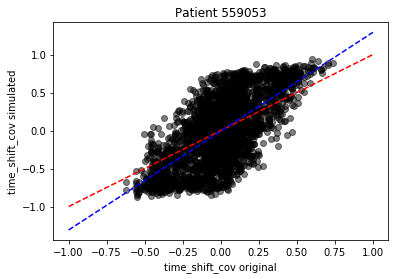

Slope:  1.3008872578543176 P-Value:  0.0
--------------------------------------------------------------


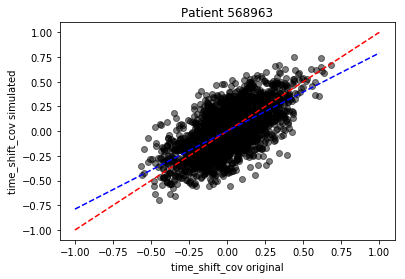

Slope:  0.7897714517186832 P-Value:  1.0717014868024722e-282
--------------------------------------------------------------


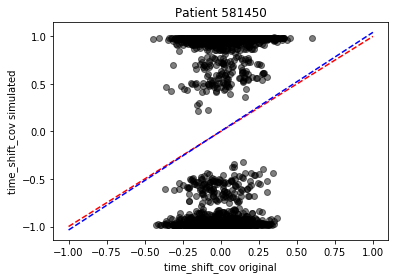

Slope:  1.0396192133509485 P-Value:  2.04892269997991e-16
--------------------------------------------------------------


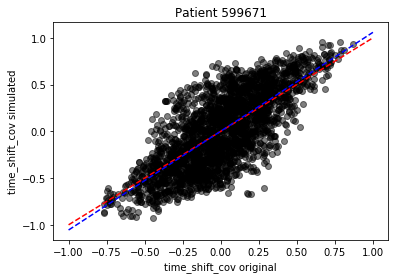

Slope:  1.0571408880062239 P-Value:  0.0
--------------------------------------------------------------


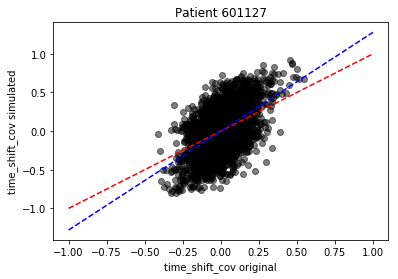

Slope:  1.2790241813138055 P-Value:  1.0368091263581336e-198
--------------------------------------------------------------


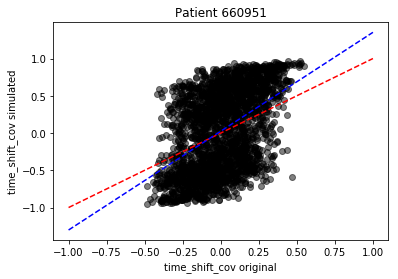

Slope:  1.326511446863862 P-Value:  2.566223920012708e-149
--------------------------------------------------------------


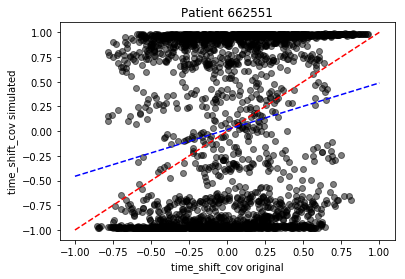

Slope:  0.4720512297851072 P-Value:  2.8145396216454145e-24
--------------------------------------------------------------


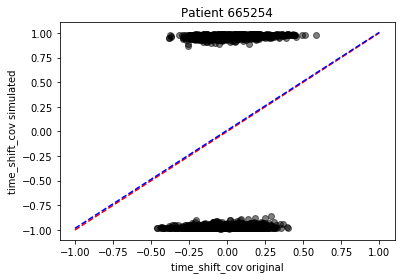

Slope:  0.9945004725278923 P-Value:  1.4312172654480875e-14
--------------------------------------------------------------


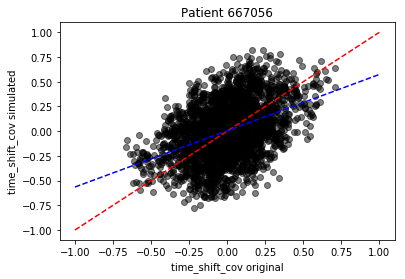

Slope:  0.5693527139097913 P-Value:  1.5415756741362316e-105
--------------------------------------------------------------


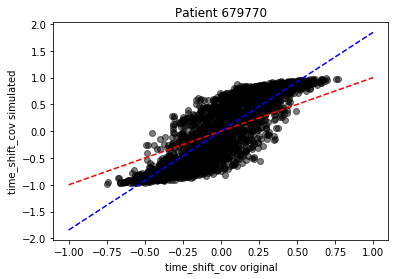

Slope:  1.8447583832312435 P-Value:  0.0
--------------------------------------------------------------


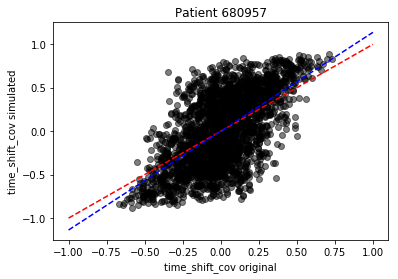

Slope:  1.137240688713591 P-Value:  3.812089752309369e-270
--------------------------------------------------------------


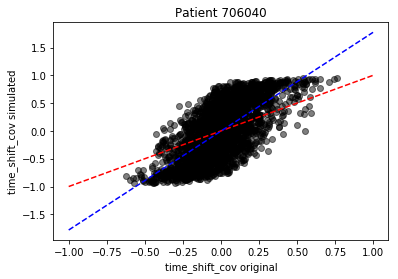

Slope:  1.7778532744198818 P-Value:  0.0
--------------------------------------------------------------


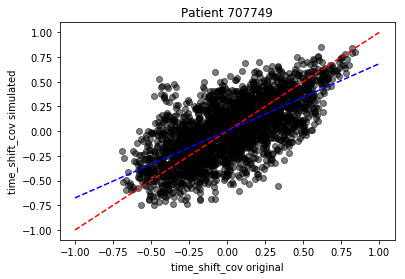

Slope:  0.6791546529241359 P-Value:  0.0
--------------------------------------------------------------


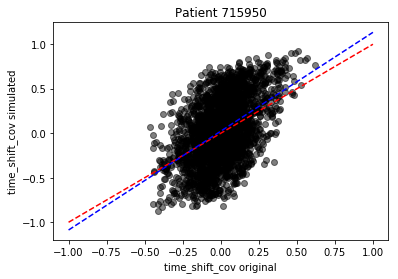

Slope:  1.1103977180614606 P-Value:  2.0975731923596648e-150
--------------------------------------------------------------


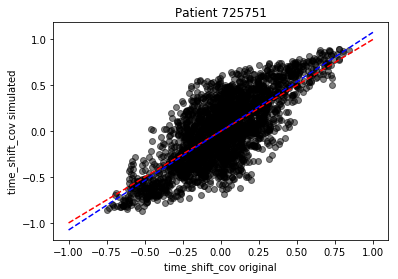

Slope:  1.0771815292053477 P-Value:  0.0
--------------------------------------------------------------


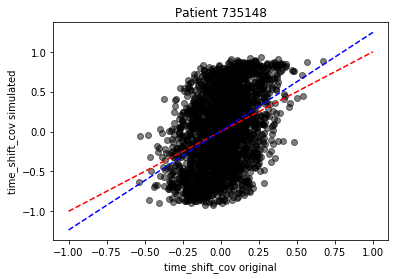

Slope:  1.239832652416796 P-Value:  2.8900763248904086e-104
--------------------------------------------------------------


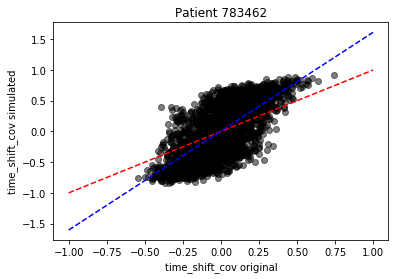

Slope:  1.608975622090611 P-Value:  0.0
--------------------------------------------------------------


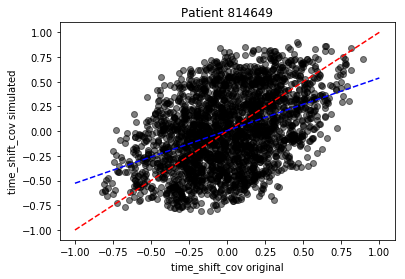

Slope:  0.5324788304531015 P-Value:  1.2032690436761519e-109
--------------------------------------------------------------


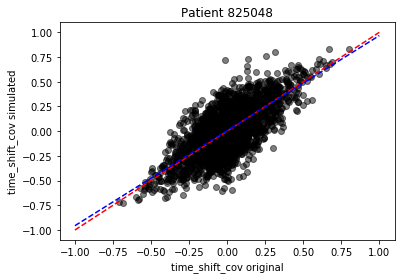

Slope:  0.9615993688350414 P-Value:  0.0
--------------------------------------------------------------


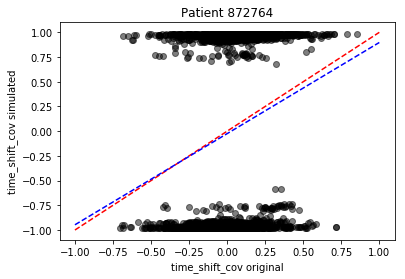

Slope:  0.9222581730962388 P-Value:  2.1290995015241867e-25
--------------------------------------------------------------


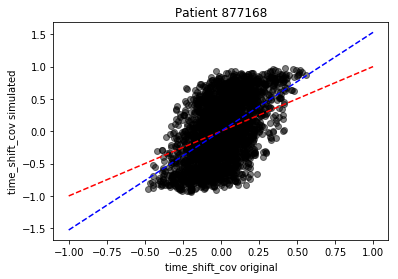

Slope:  1.5282081674403218 P-Value:  2.678508950950964e-177
--------------------------------------------------------------


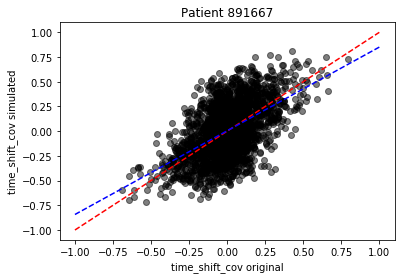

Slope:  0.8467906821324569 P-Value:  8.256471490765198e-188
--------------------------------------------------------------


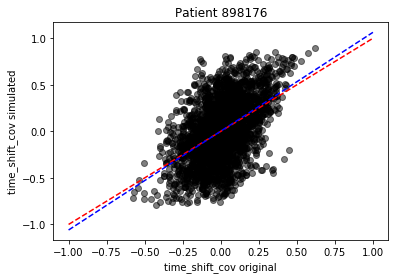

Slope:  1.0618128524691834 P-Value:  5.557292572438523e-162
--------------------------------------------------------------


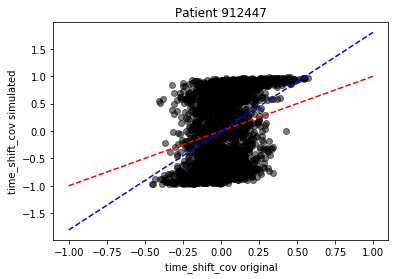

Slope:  1.806066978823854 P-Value:  1.90991404724437e-103
--------------------------------------------------------------


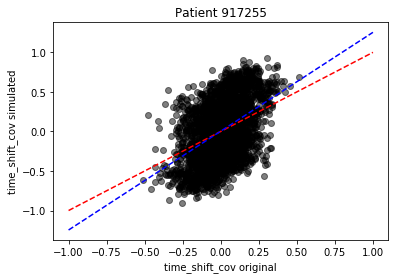

Slope:  1.249656092480793 P-Value:  2.3990580461887507e-140
--------------------------------------------------------------


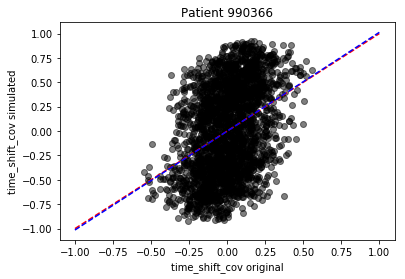

Slope:  1.0137248657765954 P-Value:  1.0966121743564868e-82
--------------------------------------------------------------


In [5]:
# allwmatrices is a dictionary with patient identifiers as keys. allwmatrices[key] will return the w matrix 
# for that specific patient


for patient in allwmatrices:
    w = allwmatrices[patient]
    sig = allsigs[patient]
    bias = allbiases[patient]

    x_original = pca_data_dict[patient].T.copy()

    # simulate MEG timecourse data using the w, sigma, and bias computed from the inference code
    simulated_data = RestingStateMEG_HCP_Inference.simulate(pca_components, 1018, w=w, sigma=sig, rho=0, bias=bias)

    # compute the time shift covariance matrices for the 'original' (transformed PCA MEG timecourse) and simulated data
    tsc_original = RestingStateMEG_HCP_Inference.time_shift_cov(x_original, shift=time_shift)
    tsc_simulated = RestingStateMEG_HCP_Inference.time_shift_cov(simulated_data[0], shift=time_shift)


    line_object = linregress(tsc_original, tsc_simulated)
    plt.title('Patient ' + str(patient))
    plt.xlabel('time_shift_cov original')
    plt.ylabel('time_shift_cov simulated')
    plt.plot(tsc_original, tsc_simulated, 'ko', alpha=0.5)
    plt.plot([-1, 1], [-1,1], 'r--')
    time_shift_axes = np.arange(-1, 2)
    plt.plot(time_shift_axes, (line_object.slope*time_shift_axes)+line_object.intercept, 'b--')
    plt.show()
    print("Slope: ", line_object.slope, "P-Value: ", line_object.pvalue)
    print("--------------------------------------------------------------")
    

### Further Testing of Predictive Power for Network Inference

We can also infer the W matrix from a patient, simulate data using that W matrix, and infer another W matrix. If the network inference script were truly predictive, we would be able to see a strong relationship between the original inferred W matrix, and the W matrix inferred from the simulated data

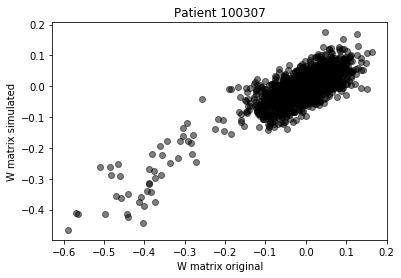

Slope:  0.6508745917491233 P-Value:  0.0
--------------------------------------------------------------


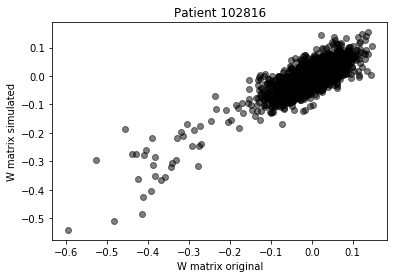

Slope:  0.7034816026327836 P-Value:  0.0
--------------------------------------------------------------


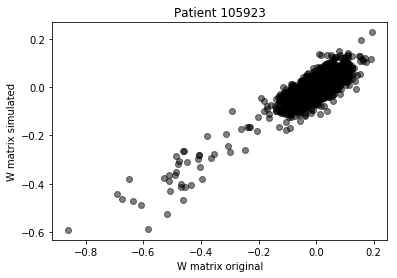

Slope:  0.6964713646376223 P-Value:  0.0
--------------------------------------------------------------


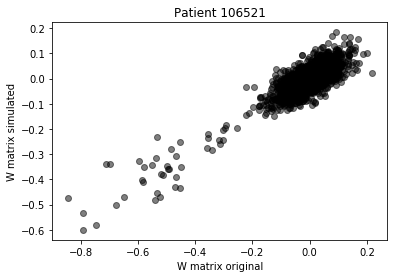

Slope:  0.6385954849615828 P-Value:  0.0
--------------------------------------------------------------


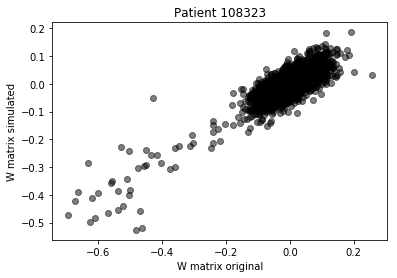

Slope:  0.6388245630723779 P-Value:  0.0
--------------------------------------------------------------


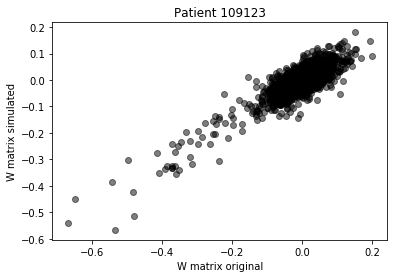

Slope:  0.7275114787996352 P-Value:  0.0
--------------------------------------------------------------


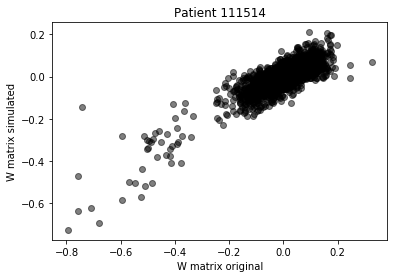

Slope:  0.6504908300682218 P-Value:  0.0
--------------------------------------------------------------


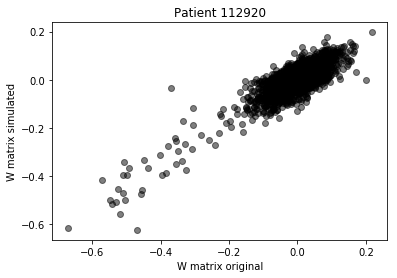

Slope:  0.7819975266887427 P-Value:  0.0
--------------------------------------------------------------


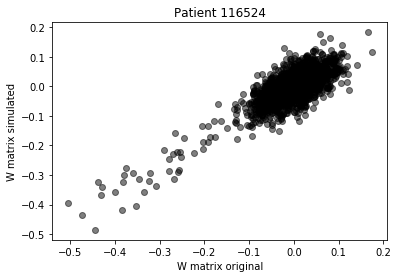

Slope:  0.8011062715692708 P-Value:  0.0
--------------------------------------------------------------


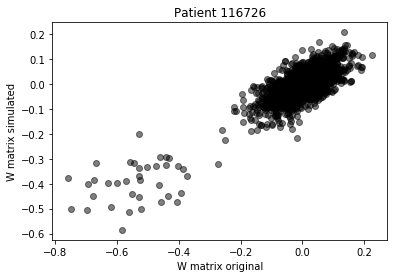

Slope:  0.6533845961891049 P-Value:  0.0
--------------------------------------------------------------


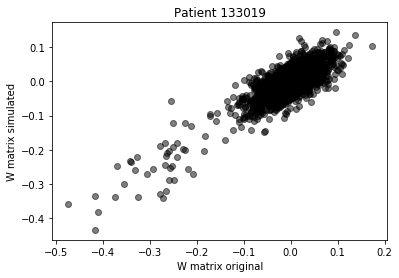

Slope:  0.7537088268854784 P-Value:  0.0
--------------------------------------------------------------


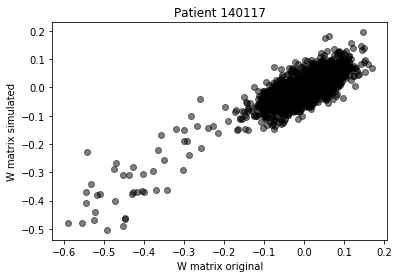

Slope:  0.7001966971608807 P-Value:  0.0
--------------------------------------------------------------


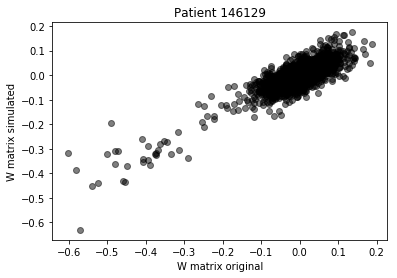

Slope:  0.7022231410864146 P-Value:  0.0
--------------------------------------------------------------


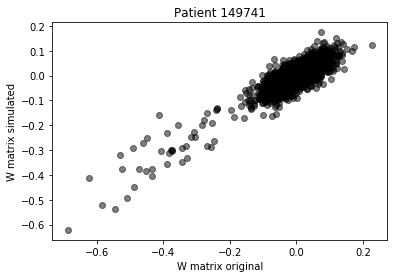

Slope:  0.7275431973078446 P-Value:  0.0
--------------------------------------------------------------


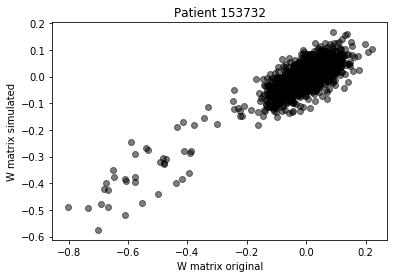

Slope:  0.5959710982808842 P-Value:  0.0
--------------------------------------------------------------


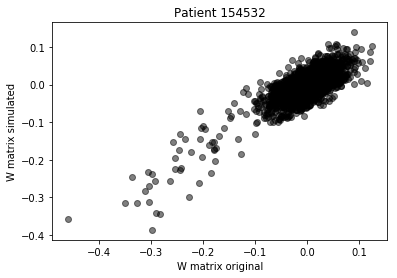

Slope:  0.7506429875429632 P-Value:  0.0
--------------------------------------------------------------


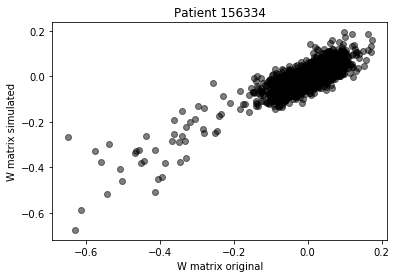

Slope:  0.7202520893230395 P-Value:  0.0
--------------------------------------------------------------


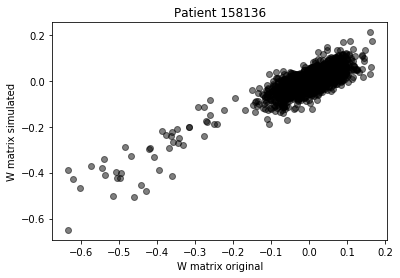

Slope:  0.7053058088149199 P-Value:  0.0
--------------------------------------------------------------


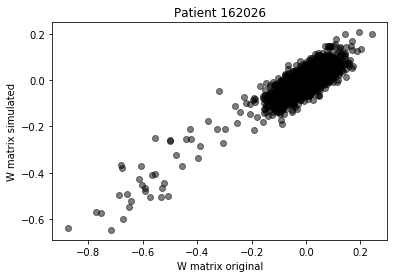

Slope:  0.6866600722171387 P-Value:  0.0
--------------------------------------------------------------


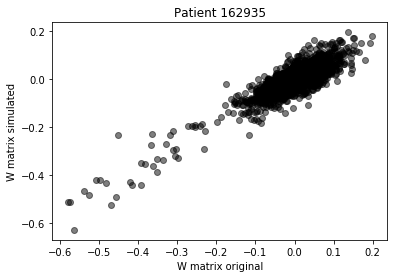

Slope:  0.8237658103431128 P-Value:  0.0
--------------------------------------------------------------


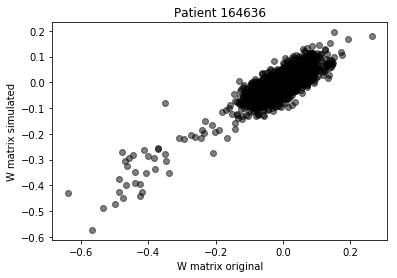

Slope:  0.7268913226192236 P-Value:  0.0
--------------------------------------------------------------


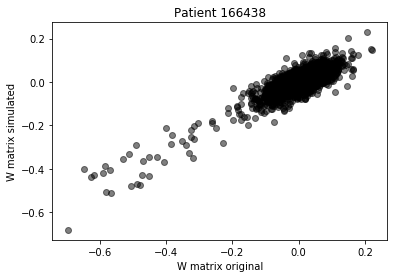

Slope:  0.7140134850413579 P-Value:  0.0
--------------------------------------------------------------


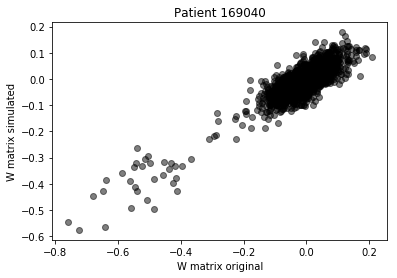

Slope:  0.6804012832147457 P-Value:  0.0
--------------------------------------------------------------


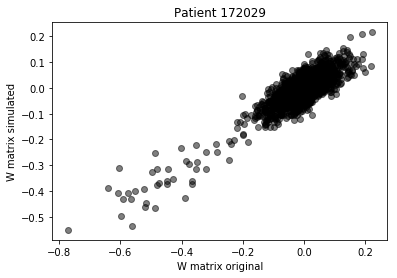

Slope:  0.707663744684367 P-Value:  0.0
--------------------------------------------------------------


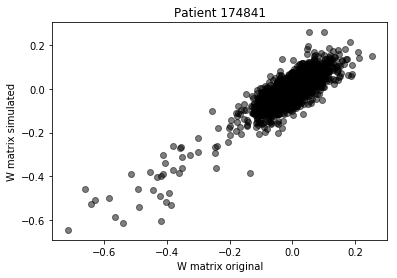

Slope:  0.8613148264490568 P-Value:  0.0
--------------------------------------------------------------


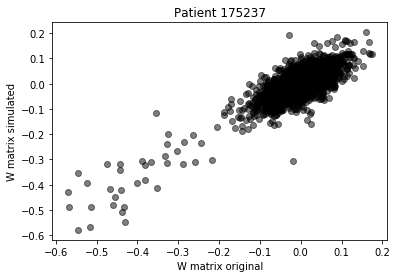

Slope:  0.8122056217110848 P-Value:  0.0
--------------------------------------------------------------


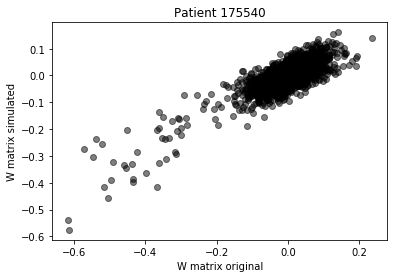

Slope:  0.6246353488603871 P-Value:  0.0
--------------------------------------------------------------


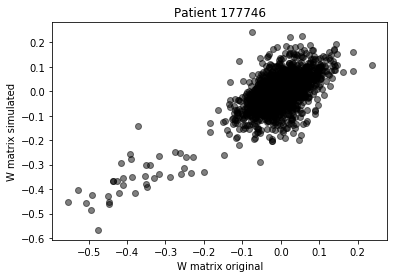

Slope:  0.8305811991454963 P-Value:  0.0
--------------------------------------------------------------


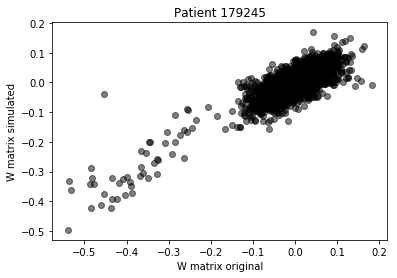

Slope:  0.6817457677940251 P-Value:  0.0
--------------------------------------------------------------


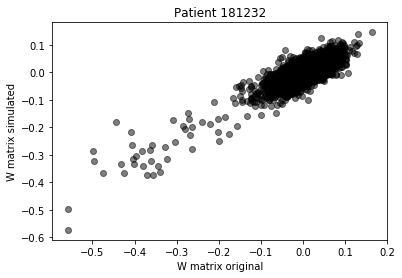

Slope:  0.726761150543306 P-Value:  0.0
--------------------------------------------------------------


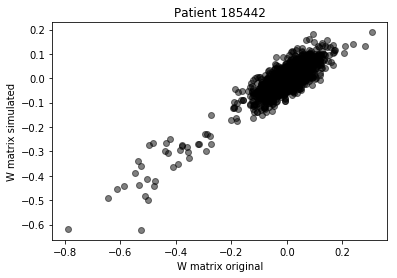

Slope:  0.7214135899281324 P-Value:  0.0
--------------------------------------------------------------


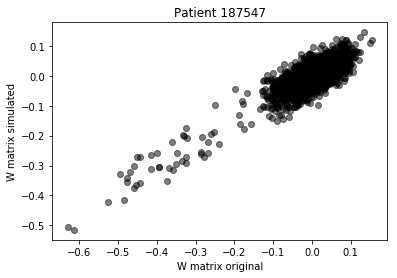

Slope:  0.6974748215447147 P-Value:  0.0
--------------------------------------------------------------


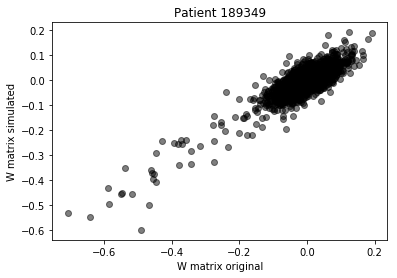

Slope:  0.7350671481053948 P-Value:  0.0
--------------------------------------------------------------


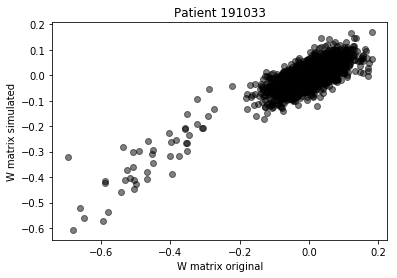

Slope:  0.6560962771833448 P-Value:  0.0
--------------------------------------------------------------


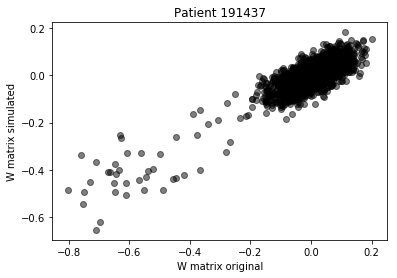

Slope:  0.6321684449030283 P-Value:  0.0
--------------------------------------------------------------


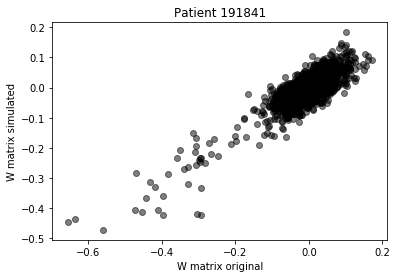

Slope:  0.7291332703771852 P-Value:  0.0
--------------------------------------------------------------


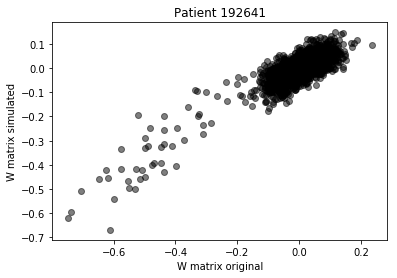

Slope:  0.6736954301827357 P-Value:  0.0
--------------------------------------------------------------


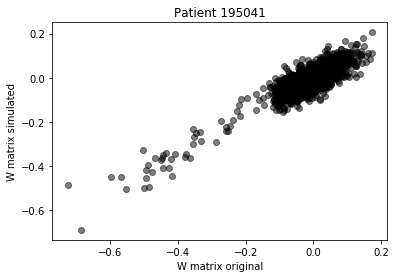

Slope:  0.7746447592882201 P-Value:  0.0
--------------------------------------------------------------


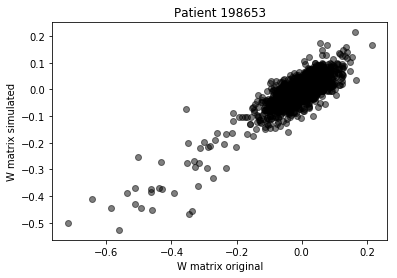

Slope:  0.7238082224160811 P-Value:  0.0
--------------------------------------------------------------


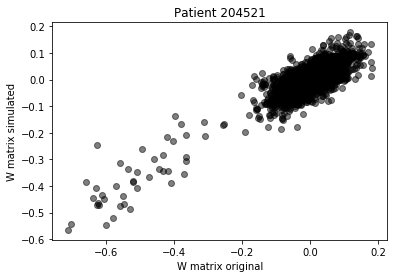

Slope:  0.6644567264649887 P-Value:  0.0
--------------------------------------------------------------


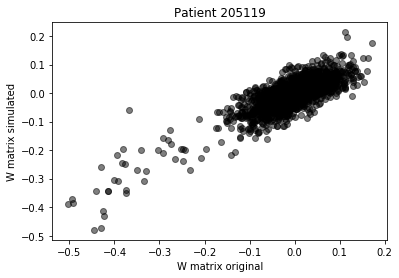

Slope:  0.6901526154111067 P-Value:  0.0
--------------------------------------------------------------


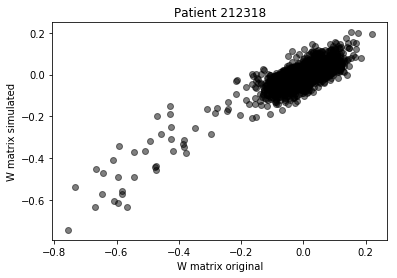

Slope:  0.710516594538287 P-Value:  0.0
--------------------------------------------------------------


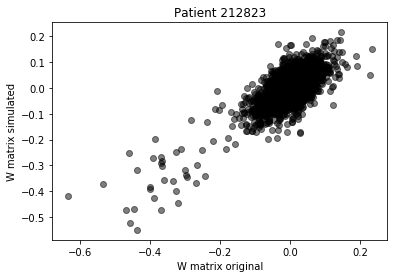

Slope:  0.8165259289599476 P-Value:  0.0
--------------------------------------------------------------


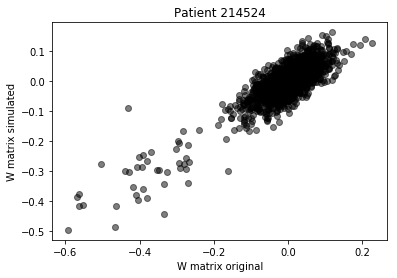

Slope:  0.7361154846753255 P-Value:  0.0
--------------------------------------------------------------


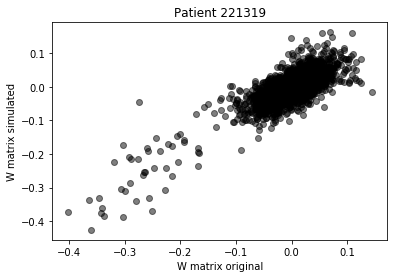

Slope:  0.8270330733440789 P-Value:  0.0
--------------------------------------------------------------


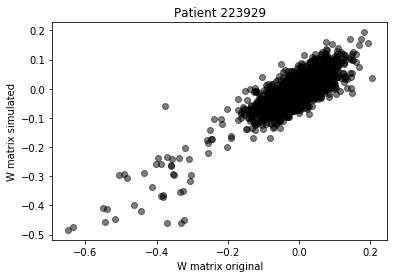

Slope:  0.7133321729644231 P-Value:  0.0
--------------------------------------------------------------


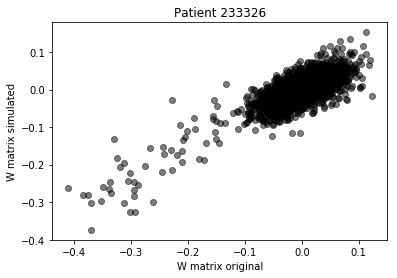

Slope:  0.6844333452694391 P-Value:  0.0
--------------------------------------------------------------


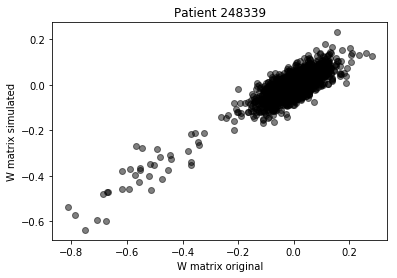

Slope:  0.655279794497709 P-Value:  0.0
--------------------------------------------------------------


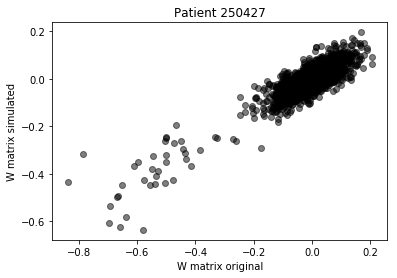

Slope:  0.6595753268687508 P-Value:  0.0
--------------------------------------------------------------


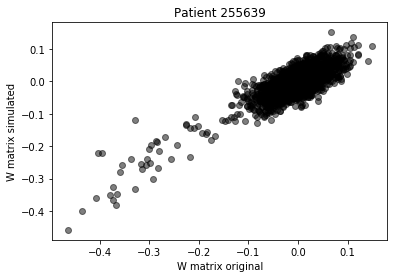

Slope:  0.7274627202552325 P-Value:  0.0
--------------------------------------------------------------


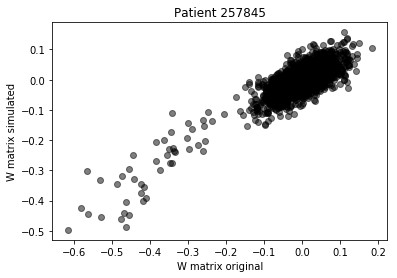

Slope:  0.6766748977430976 P-Value:  0.0
--------------------------------------------------------------


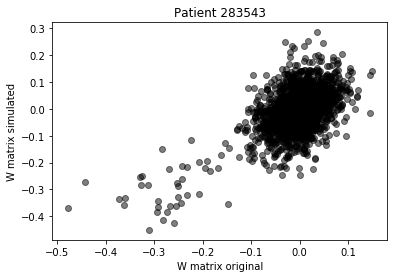

Slope:  0.8700209529981879 P-Value:  8.410090180010545e-235
--------------------------------------------------------------


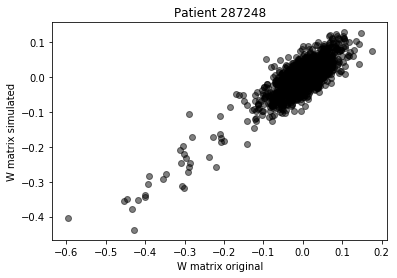

Slope:  0.736360785526181 P-Value:  0.0
--------------------------------------------------------------


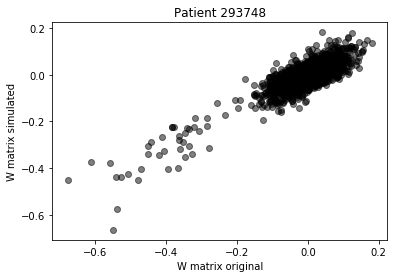

Slope:  0.7194021029464894 P-Value:  0.0
--------------------------------------------------------------


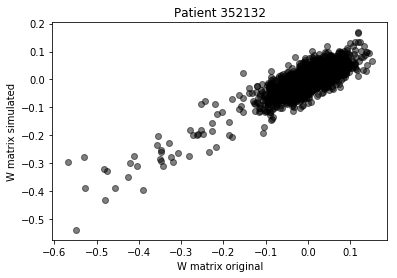

Slope:  0.6965199632405268 P-Value:  0.0
--------------------------------------------------------------


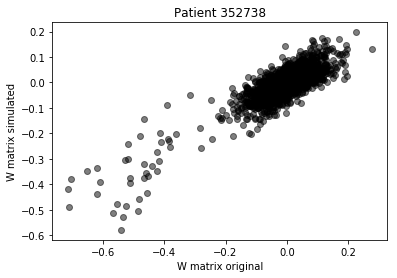

Slope:  0.6342389705155989 P-Value:  0.0
--------------------------------------------------------------


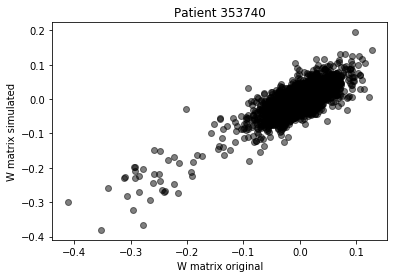

Slope:  0.7972167319012451 P-Value:  0.0
--------------------------------------------------------------


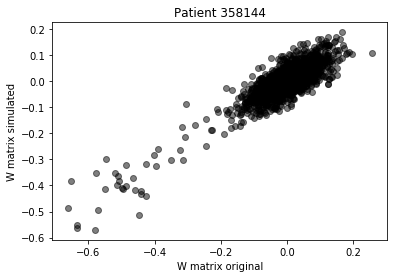

Slope:  0.7267639074874482 P-Value:  0.0
--------------------------------------------------------------


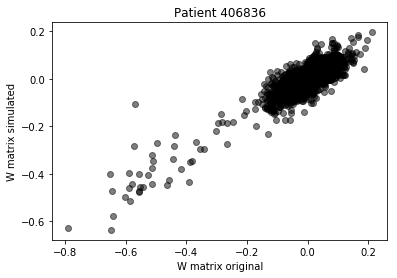

Slope:  0.7157686065700204 P-Value:  0.0
--------------------------------------------------------------


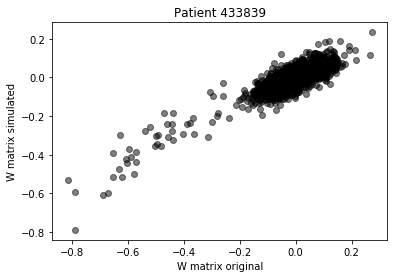

Slope:  0.6409363946172435 P-Value:  0.0
--------------------------------------------------------------


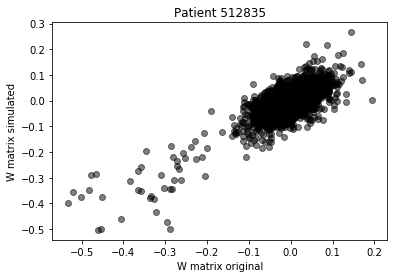

Slope:  0.811266832673134 P-Value:  0.0
--------------------------------------------------------------


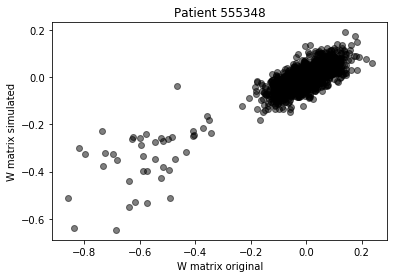

Slope:  0.548022811331746 P-Value:  0.0
--------------------------------------------------------------


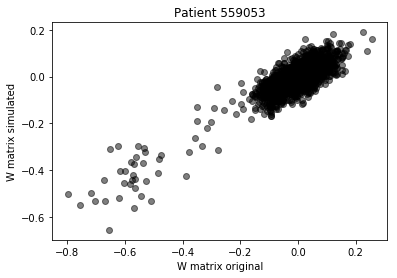

Slope:  0.6697702548479568 P-Value:  0.0
--------------------------------------------------------------


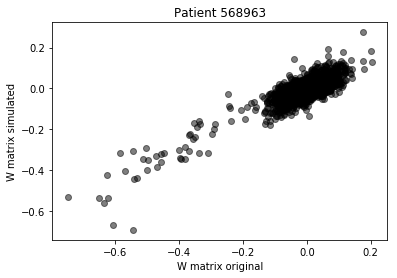

Slope:  0.7067605073253502 P-Value:  0.0
--------------------------------------------------------------


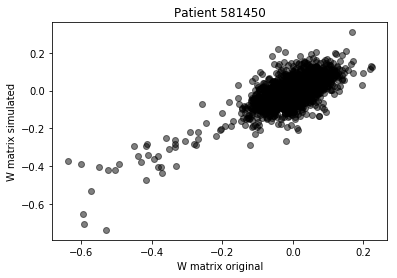

Slope:  0.7927378681899763 P-Value:  0.0
--------------------------------------------------------------


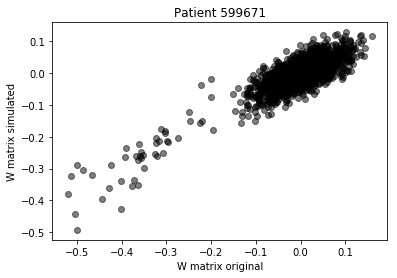

Slope:  0.6690220410713574 P-Value:  0.0
--------------------------------------------------------------


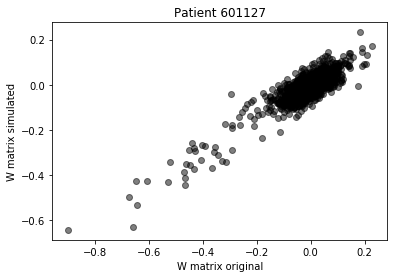

Slope:  0.6816019993591946 P-Value:  0.0
--------------------------------------------------------------


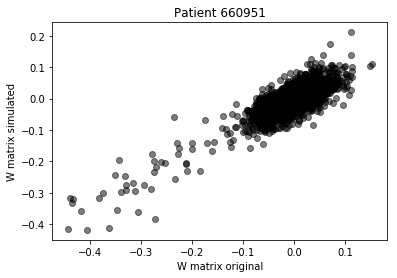

Slope:  0.7988963828971208 P-Value:  0.0
--------------------------------------------------------------


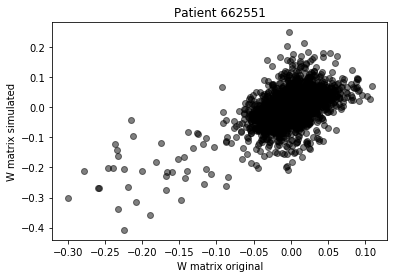

Slope:  0.9367104348422052 P-Value:  9.656752585049673e-225
--------------------------------------------------------------


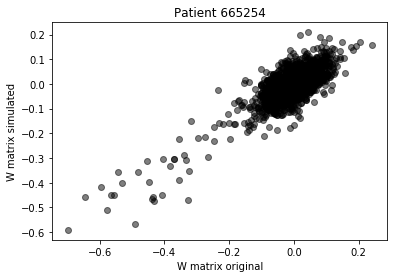

Slope:  0.7717420810430838 P-Value:  0.0
--------------------------------------------------------------


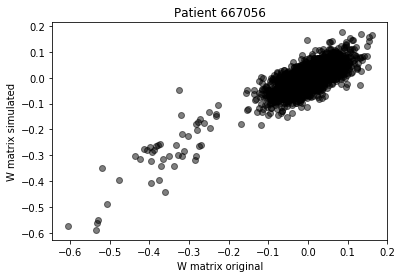

Slope:  0.7480882937448224 P-Value:  0.0
--------------------------------------------------------------


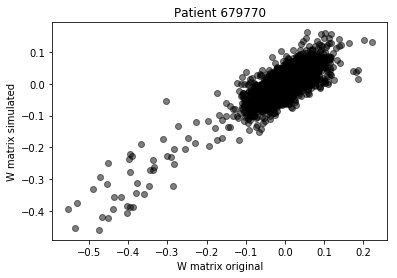

Slope:  0.7253265986141126 P-Value:  0.0
--------------------------------------------------------------


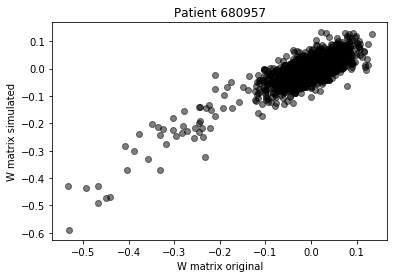

Slope:  0.7433818457540884 P-Value:  0.0
--------------------------------------------------------------


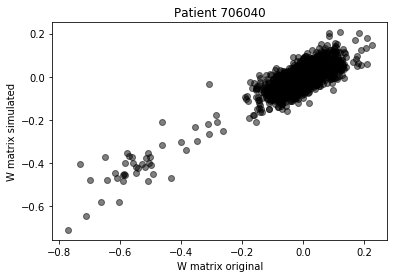

Slope:  0.705487741584178 P-Value:  0.0
--------------------------------------------------------------


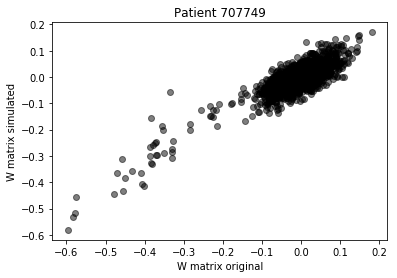

Slope:  0.7268702951035285 P-Value:  0.0
--------------------------------------------------------------


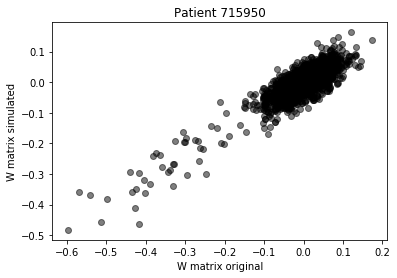

Slope:  0.7239050248343197 P-Value:  0.0
--------------------------------------------------------------


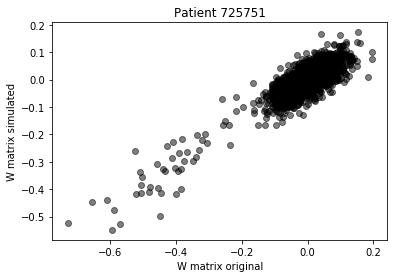

Slope:  0.7065285940388754 P-Value:  0.0
--------------------------------------------------------------


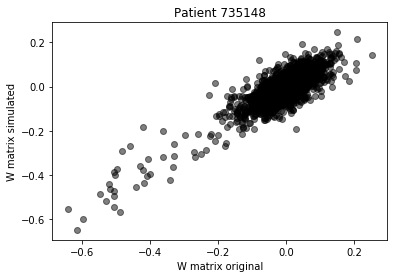

Slope:  0.8231121458548191 P-Value:  0.0
--------------------------------------------------------------


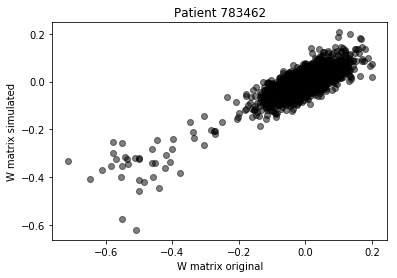

Slope:  0.6419891594317205 P-Value:  0.0
--------------------------------------------------------------


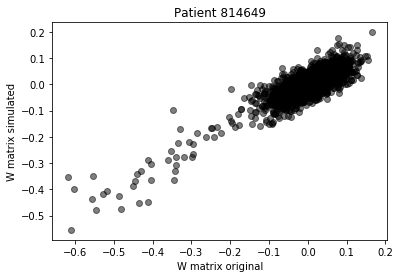

Slope:  0.7239593022444055 P-Value:  0.0
--------------------------------------------------------------


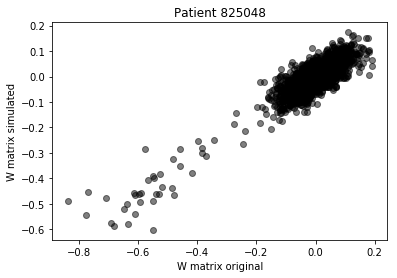

Slope:  0.7113674112029492 P-Value:  0.0
--------------------------------------------------------------


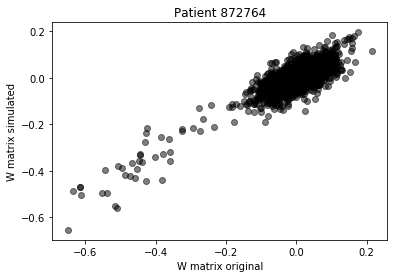

Slope:  0.7545700330880587 P-Value:  0.0
--------------------------------------------------------------


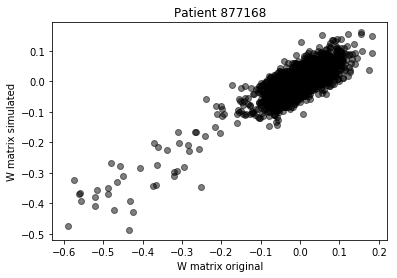

Slope:  0.6811410173132695 P-Value:  0.0
--------------------------------------------------------------


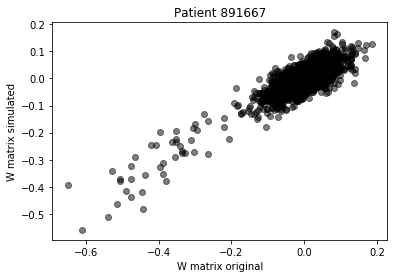

Slope:  0.6964222367727264 P-Value:  0.0
--------------------------------------------------------------


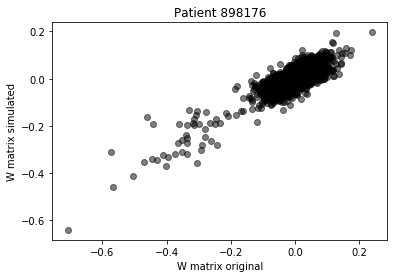

Slope:  0.6674405064328472 P-Value:  0.0
--------------------------------------------------------------


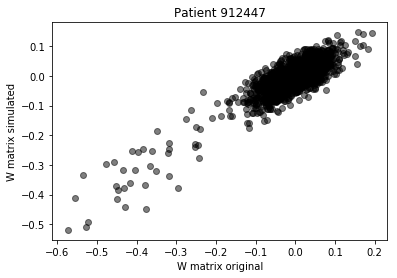

Slope:  0.7314249022654107 P-Value:  0.0
--------------------------------------------------------------


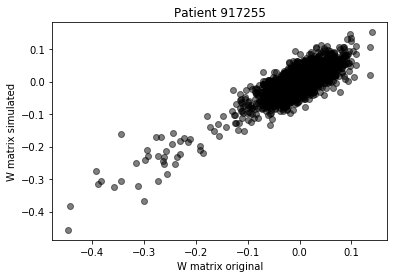

Slope:  0.7923064020214269 P-Value:  0.0
--------------------------------------------------------------


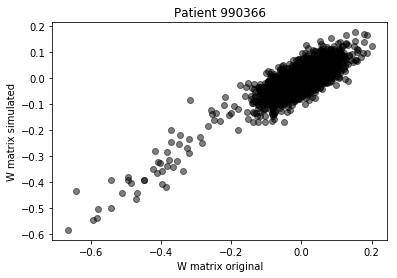

Slope:  0.7378502216544067 P-Value:  0.0
--------------------------------------------------------------


In [6]:
for patient in allwmatrices:
    w = allwmatrices[patient]
    sig = allsigs[patient]
    bias = allbiases[patient]

    x_original = pca_data_dict[patient].T.copy()

    # simulate MEG timecourse data using the w, sigma, and bias computed from the inference code
    simulated_data = RestingStateMEG_HCP_Inference.simulate(pca_components, 1018, w=w, sigma=sig, rho=0, bias=bias)
    w_simulated, sig_simulated, bias_simulated = RestingStateMEG_HCP_Inference.infer(simulated_data[0], power=power)
    
    line_object = linregress(w, w_simulated)
    plt.title('Patient ' + str(patient))
    plt.xlabel('W matrix original')
    plt.ylabel('W matrix simulated')
    plt.plot(w, w_simulated, 'ko', alpha=0.5)
#     plt.plot([-1, 1], [-1,1], 'r--')
    time_shift_axes = np.arange(-0.25, 0.5)
#     plt.plot(time_shift_axes, (line_object.slope*time_shift_axes)+line_object.intercept, 'b--')
    plt.show()
    print("Slope: ", line_object.slope, "P-Value: ", line_object.pvalue)
    print("--------------------------------------------------------------")

### Clustering of W matrices

Interestingly, a spectral clustering analysis of all the computed W matrices for the patients in the HCP database leads to the formation of several groups of similar W matrices, indicating shared resting state brain networks among different patients. 

In [7]:
# spectral clustering, spectrally cluster the W matrices of all the patients to see if certain patients fall into 
# certain categories. Do for all 88 patients

# prepare a matrix to input into the spectral clustering function, must flatten all the W matrices
def wmatrix_clustering_prepare(allwmatrices):
    flattened_wmatrix_array = []
    unflattened_wmatrix_dict = {}
    counter = 0
    for patient in allwmatrices:
        flattened_matrix = allwmatrices[patient].flatten()
        unflattened_wmatrix_dict[counter] = allwmatrices[patient]
        if len(flattened_wmatrix_array) == 0:
            flattened_wmatrix_array = [flattened_matrix]
        else:
            flattened_wmatrix_array.append(flattened_matrix)
        counter = counter + 1
    return flattened_wmatrix_array, unflattened_wmatrix_dict
flattened_wmatrix_array, unflattened_wmatrix_dict = wmatrix_clustering_prepare(allwmatrices)

# Cluster the wmatrices using spectral clustering
from sklearn.cluster import SpectralClustering
from scipy import stats
import numpy as np
from itertools import cycle, islice
clustering_w = SpectralClustering(assign_labels="discretize",
             random_state=0).fit(flattened_wmatrix_array)
# clustering = SpectralClustering(assign_labels="kmeans").fit(flattened_wmatrix_array)

cluster_dict_w = {}
counter = 0
for grouping in clustering_w.labels_:
    if grouping not in cluster_dict_w:
        cluster_dict_w[grouping] = [dataset_ids[counter]]
    else:
        cluster_dict_w[grouping].append(dataset_ids[counter])
    counter = counter + 1

for key in cluster_dict_w:
    print("Number of Patients in Cluster", key, ":", len(cluster_dict_w[key]))
    
cluster_number = len(cluster_dict_w.keys())

Number of Patients in Cluster 0 : 23
Number of Patients in Cluster 5 : 11
Number of Patients in Cluster 1 : 7
Number of Patients in Cluster 3 : 14
Number of Patients in Cluster 7 : 8
Number of Patients in Cluster 6 : 9
Number of Patients in Cluster 4 : 10
Number of Patients in Cluster 2 : 6


### W matrix Visualization in 2-D Space

We can visualize the datapoints for each patient by using UMAP. This allows us to see how the clusters for each patient's W matrix is organized. 

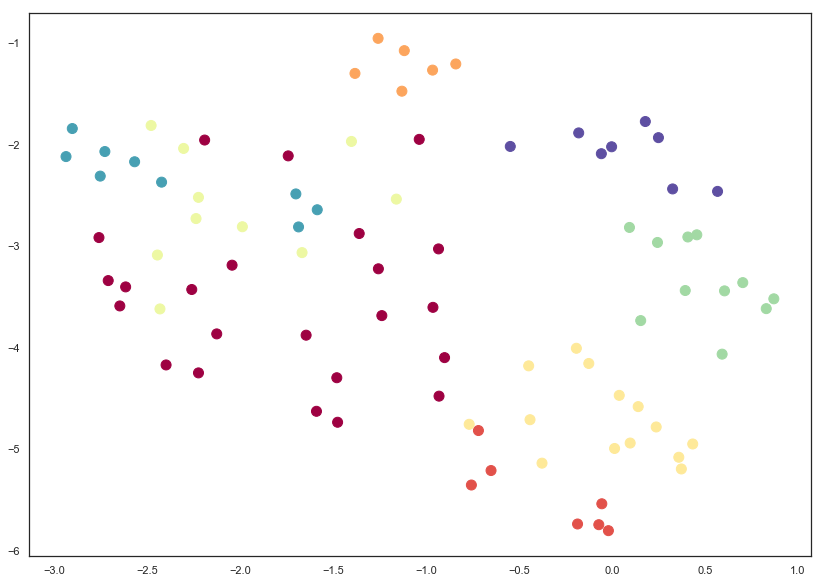

In [8]:
import umap
from sklearn.datasets import load_digits

standard_embedding_w = umap.UMAP(random_state=42).fit_transform(np.matrix(flattened_wmatrix_array))

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
plt.scatter(standard_embedding_w[:, 0], standard_embedding_w[:, 1], c=clustering_w.labels_, s=100, cmap='Spectral');


### Clustering of Time Shift Covariance Matrices from the Experimental MEG Data

We also want to see how the clusters look for the time shift covariance matrices for each patient's experimental MEG data. Since we wish to see how correlated the W matrices and Time Shift Covariance matrices are to each other, we would like to see if the different clusterings of the two types of matrices agree with each other or not. 

In [9]:
flattened_tscmatrix_array, unflattened_tscmatrix_dict = wmatrix_clustering_prepare(alltscmatrices)

# Cluster the wmatrices using spectral clustering
from sklearn.cluster import SpectralClustering
from scipy import stats
import numpy as np
from itertools import cycle, islice
clustering_tsc = SpectralClustering(assign_labels="discretize",
             random_state=0).fit(flattened_tscmatrix_array)
# clustering = SpectralClustering(assign_labels="kmeans").fit(flattened_wmatrix_array)

cluster_dict_tsc = {}
counter = 0
for grouping in clustering_tsc.labels_:
    if grouping not in cluster_dict_tsc:
        cluster_dict_tsc[grouping] = [dataset_ids[counter]]
    else:
        cluster_dict_tsc[grouping].append(dataset_ids[counter])
    counter = counter + 1

for key in cluster_dict_tsc:
    print("Number of Patients in Cluster", key, ":", len(cluster_dict_tsc[key]))
    
# cluster_number = len(cluster_dict_tsc.keys())

Number of Patients in Cluster 4 : 3
Number of Patients in Cluster 2 : 63
Number of Patients in Cluster 3 : 2
Number of Patients in Cluster 1 : 5
Number of Patients in Cluster 0 : 9
Number of Patients in Cluster 7 : 1
Number of Patients in Cluster 6 : 4
Number of Patients in Cluster 5 : 1


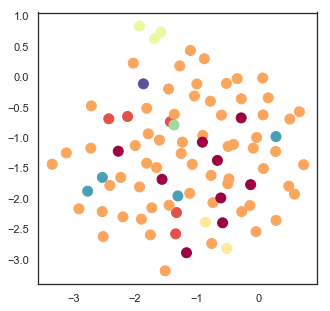

In [10]:
import umap
from sklearn.datasets import load_digits

standard_embedding_tsc = umap.UMAP(random_state=42).fit_transform(np.matrix(flattened_tscmatrix_array))

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='white', context='notebook', rc={'figure.figsize':(5,5)})
plt.scatter(standard_embedding_tsc[:, 0], standard_embedding_tsc[:, 1], c=clustering_tsc.labels_, s=100, cmap='Spectral');


### Using TSNE on W matrix and Time Shift Covariance Data from MEG Recordings

W Matrix


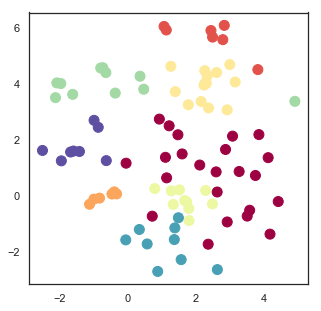


Time Shift Cov Matrix


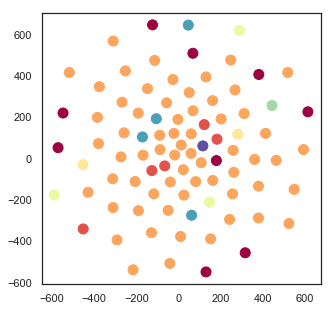

In [11]:
from sklearn.manifold import TSNE

w_embedded = TSNE(n_components=2, random_state=42).fit_transform(flattened_wmatrix_array)
tsc_embedded = TSNE(n_components=2, random_state=42).fit_transform(flattened_tscmatrix_array)

print("W Matrix")
plt.scatter(w_embedded[:, 0], w_embedded[:, 1], c=clustering_w.labels_, s=100, cmap='Spectral');
plt.show()
plt.close()
print()
print("Time Shift Cov Matrix")
plt.scatter(tsc_embedded[:, 0], tsc_embedded[:, 1], c=clustering_tsc.labels_, s=100, cmap='Spectral');
plt.show()
plt.close()

### Using K-Means Clustering instead of Spectral Clustering

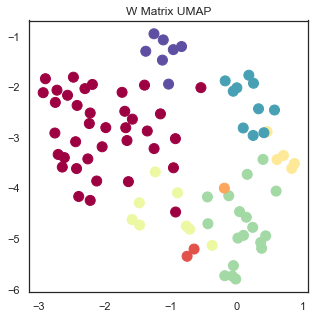

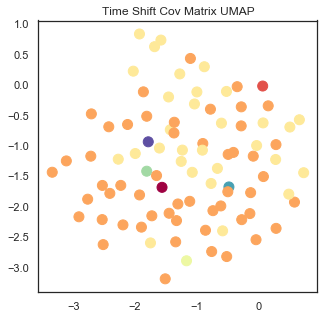

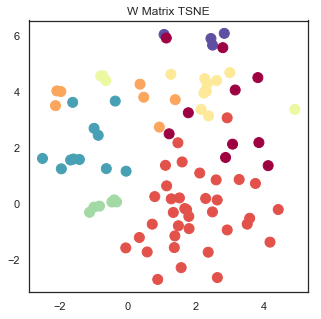

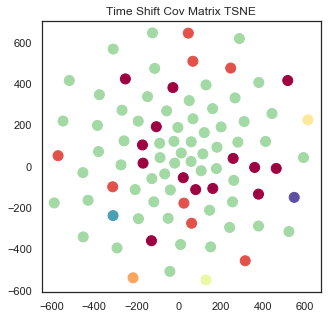

In [12]:
import sklearn.cluster as cluster

plt.title("W Matrix UMAP")
kmeans_labels_w = cluster.KMeans(n_clusters=8).fit_predict(flattened_wmatrix_array)
plt.scatter(standard_embedding_w[:, 0], standard_embedding_w[:, 1], c=kmeans_labels_w, s=100, cmap='Spectral');
plt.show()
plt.close()

plt.title("Time Shift Cov Matrix UMAP")
kmeans_labels_tsc = cluster.KMeans(n_clusters=8).fit_predict(flattened_tscmatrix_array)
plt.scatter(standard_embedding_tsc[:, 0], standard_embedding_tsc[:, 1], c=kmeans_labels_tsc, s=100, cmap='Spectral')
plt.show()
plt.close()

import sklearn.cluster as cluster

plt.title("W Matrix TSNE")
kmeans_labels_w = cluster.KMeans(n_clusters=8).fit_predict(flattened_wmatrix_array)
plt.scatter(w_embedded[:, 0], w_embedded[:, 1], c=kmeans_labels_w, s=100, cmap='Spectral');
plt.show()
plt.close()

plt.title("Time Shift Cov Matrix TSNE")
kmeans_labels_tsc = cluster.KMeans(n_clusters=8).fit_predict(flattened_tscmatrix_array)
plt.scatter(tsc_embedded[:, 0], tsc_embedded[:, 1], c=kmeans_labels_tsc, s=100, cmap='Spectral')
plt.show()
plt.close()

### Compare the Clusterings for Time Shift Covariance Matrics and the W Matrices

We want to know if there are shared patients/similar clustering patterns between the spectral clustering analyses performed for the two types of matrices formed from the HCP MEG data

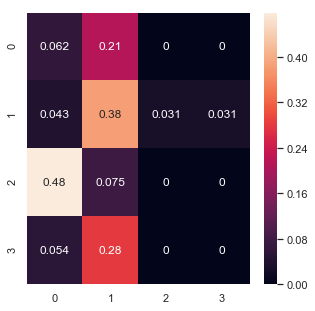

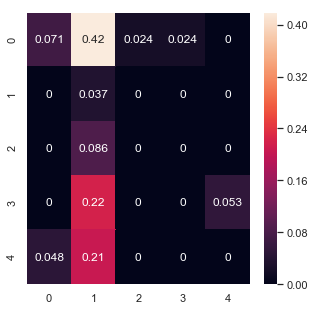

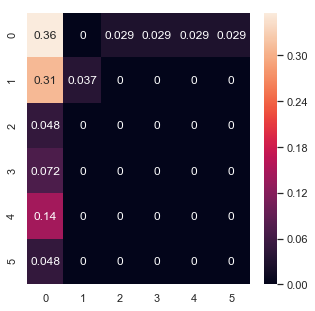

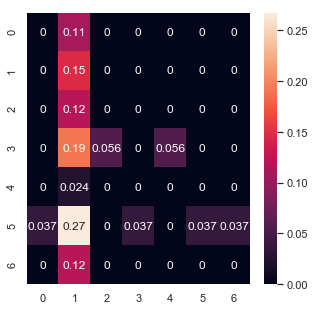

In [13]:
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 

def union(lst1, lst2):
    return list(set(lst1) | set(lst2))

# cluster_mapping_matrix = np.zeros((len(cluster_dict_w.keys()), len(cluster_dict_tsc.keys())))
# for key_w in cluster_dict_w:
#     for key_tsc in cluster_dict_tsc:
#         cluster_mapping_matrix[key_w][key_tsc] = len(intersection(cluster_dict_w[key_w], cluster_dict_tsc[key_tsc]))/len(union(cluster_dict_w[key_w], cluster_dict_tsc[key_tsc]))
        
# import seaborn
# seaborn.heatmap(cluster_mapping_matrix, annot=True)    
# plt.show()
# plt.close()


for num_clusters in range(4, 8):
    kmeans_labels_tsc = cluster.KMeans(n_clusters=num_clusters, random_state=42).fit_predict(flattened_tscmatrix_array)   
    kmeans_labels_w = cluster.KMeans(n_clusters=num_clusters, random_state=42).fit_predict(flattened_wmatrix_array)
    
    cluster_dict_kmeans_w = {}
    counter = 0
    for grouping in kmeans_labels_w:
        if grouping not in cluster_dict_kmeans_w:
            cluster_dict_kmeans_w[grouping] = [dataset_ids[counter]]
        else:
            cluster_dict_kmeans_w[grouping].append(dataset_ids[counter])
        counter = counter + 1

    cluster_dict_kmeans_tsc = {}
    counter = 0
    for grouping in kmeans_labels_tsc:
        if grouping not in cluster_dict_kmeans_tsc:
            cluster_dict_kmeans_tsc[grouping] = [dataset_ids[counter]]
        else:
            cluster_dict_kmeans_tsc[grouping].append(dataset_ids[counter])
        counter = counter + 1
     
    cluster_mapping_matrix = np.zeros((len(cluster_dict_kmeans_w.keys()), len(cluster_dict_kmeans_tsc.keys())))
    for key_w in cluster_dict_kmeans_tsc:
        for key_tsc in cluster_dict_kmeans_tsc:
            cluster_mapping_matrix[key_w][key_tsc] = len(intersection(cluster_dict_kmeans_w[key_w], cluster_dict_kmeans_tsc[key_tsc]))/len(union(cluster_dict_kmeans_w[key_w], cluster_dict_kmeans_tsc[key_tsc]))
    
    import seaborn
    seaborn.heatmap(cluster_mapping_matrix, annot=True)    
    plt.show()
    plt.close()

In [14]:
# are the same sets of patients in the same cluster groupings across time shift cov and w matrices?
for key in cluster_dict_w:
    print("Cluster", key, ":", cluster_dict_w[key])
print()
for key in cluster_dict_tsc:
    print("Cluster", key, ":", cluster_dict_tsc[key])
    
links = {}
for key in cluster_dict_w:
    for patient in cluster_dict_w[key]:
        for key2 in cluster_dict_tsc:
            for patient2 in cluster_dict_tsc[key2]:
                if patient == patient2:
                    #do something
                    links[patient] = (key, key2)
                    
# for key in cluster_dict_tsc:
#     for patient in cluster_dict_tsc[key]:
#         for key2 in cluster_dict_w:
#             for patient2 in cluster_dict_w[key2]:
#                 if patient == patient2:
#                     #do something
#                     links[patient] = (key, key2)

Cluster 0 : ['100307', '102816', '109123', '111514', '146129', '158136', '175540', '179245', '187547', '191033', '204521', '214524', '257845', '568963', '599671', '667056', '679770', '707749', '715950', '725751', '783462', '898176', '990366']
Cluster 5 : ['105923', '153732', '162026', '172029', '189349', '191437', '250427', '293748', '352738', '433839', '706040']
Cluster 1 : ['106521', '116726', '169040', '248339', '559053', '581450', '825048']
Cluster 3 : ['108323', '162935', '166438', '174841', '175237', '177746', '185442', '195041', '212318', '287248', '358144', '665254', '814649', '872764']
Cluster 7 : ['112920', '164636', '198653', '406836', '555348', '601127', '735148', '912447']
Cluster 6 : ['116524', '140117', '192641', '212823', '221319', '223929', '512835', '877168', '891667']
Cluster 4 : ['133019', '154532', '233326', '255639', '283543', '353740', '660951', '662551', '680957', '917255']
Cluster 2 : ['149741', '156334', '181232', '191841', '205119', '352132']

Cluster 4 : ['1

In [15]:
links

{'100307': (0, 4),
 '102816': (0, 2),
 '109123': (0, 2),
 '111514': (0, 3),
 '146129': (0, 2),
 '158136': (0, 2),
 '175540': (0, 2),
 '179245': (0, 2),
 '187547': (0, 2),
 '191033': (0, 6),
 '204521': (0, 2),
 '214524': (0, 2),
 '257845': (0, 2),
 '568963': (0, 2),
 '599671': (0, 0),
 '667056': (0, 2),
 '679770': (0, 0),
 '707749': (0, 2),
 '715950': (0, 3),
 '725751': (0, 0),
 '783462': (0, 2),
 '898176': (0, 2),
 '990366': (0, 2),
 '105923': (5, 2),
 '153732': (5, 1),
 '162026': (5, 1),
 '172029': (5, 1),
 '189349': (5, 2),
 '191437': (5, 1),
 '250427': (5, 2),
 '293748': (5, 2),
 '352738': (5, 5),
 '433839': (5, 1),
 '706040': (5, 2),
 '106521': (1, 2),
 '116726': (1, 2),
 '169040': (1, 2),
 '248339': (1, 2),
 '559053': (1, 6),
 '581450': (1, 2),
 '825048': (1, 2),
 '108323': (3, 2),
 '162935': (3, 2),
 '166438': (3, 2),
 '174841': (3, 6),
 '175237': (3, 2),
 '177746': (3, 2),
 '185442': (3, 2),
 '195041': (3, 2),
 '212318': (3, 2),
 '287248': (3, 6),
 '358144': (3, 2),
 '665254': (

In [16]:
frequency_dict = {}
for value in links.values():
    if value not in frequency_dict:
        frequency_dict[value] = 1
    else:
        frequency_dict[value] += 1

for key in frequency_dict:
    if frequency_dict[key] >= 4 :
        print("Cluster Common Count:", key, "=", frequency_dict[key])
    

Cluster Common Count: (0, 2) = 16
Cluster Common Count: (5, 2) = 5
Cluster Common Count: (5, 1) = 5
Cluster Common Count: (1, 2) = 6
Cluster Common Count: (3, 2) = 10
Cluster Common Count: (7, 2) = 6
Cluster Common Count: (6, 2) = 6
Cluster Common Count: (4, 2) = 8
Cluster Common Count: (2, 2) = 6


### Comparison of W matrices between Patients in Same/Different Cluster(s)

We can try and confirm the differences between each cluster by plotting the w matrix for a patient in one cluster against a w matrix for a patient from another cluster, and compare that plot to another plot but between w matrices of patients in the same cluster. We can also explore how the time shift covariance matrices differ between clusters. 

In [17]:
import random

cluster1 = random.randint(0, cluster_number-1)
cluster2 = random.randint(0, cluster_number-1)

while cluster2 == cluster1:
    cluster2 = random.randint(0, cluster_number)
print(cluster1, cluster2)

random1 = random.randint(0, len(cluster_dict[cluster1])-1)
random2 = random.randint(0, len(cluster_dict[cluster2])-1)   # w matrix from a different cluster as 1
random3 = random.randint(0, len(cluster_dict[cluster1])-1)   # w matrix from the same cluster as 1

while random3 == random1:
    random3 = random.randint(0, len(cluster_dict[cluster1])-1)   # make sure that the second random number is not the same as the first one

w_1 = allwmatrices[cluster_dict[cluster1][random1]].copy()
w_2 = allwmatrices[cluster_dict[cluster2][random2]].copy()
w_3 = allwmatrices[cluster_dict[cluster1][random3]].copy()

line_object = linregress(w_1, w_2)
plt.title('Patient ' + cluster_dict[cluster1][random1] + ' vs Patient ' + cluster_dict[cluster2][random2] + ' in Different Clusters')
plt.xlabel('W matrix Patient ' + cluster_dict[cluster1][random1])
plt.ylabel('W matrix Patient ' + cluster_dict[cluster2][random2])
plt.plot(w_1, w_2, 'ko', alpha=0.5)
plt.plot([-1, 1], [-1,1], 'r--')
time_shift_axes = np.arange(-1, 2)
plt.plot(time_shift_axes, (line_object.slope*time_shift_axes)+line_object.intercept, 'b--')
plt.show()
plt.close()
print("Slope: ", line_object.slope, "P-Value: ", line_object.pvalue)
print("---------------------------------------------------------------")

line_object = linregress(w_1, w_3)
plt.title('Patient ' + cluster_dict[cluster1][random1] + ' vs Patient ' + cluster_dict[cluster1][random3] + ' in the Same Cluster')
plt.xlabel('W matrix Patient ' + cluster_dict[cluster1][random1])
plt.ylabel('W matrix Patient ' + cluster_dict[cluster1][random3])
plt.plot(w_1, w_3, 'ko', alpha=0.5)
plt.plot([-1, 1], [-1,1], 'r--')
time_shift_axes = np.arange(-1, 2)
plt.plot(time_shift_axes, (line_object.slope*time_shift_axes)+line_object.intercept, 'b--')
plt.show()
plt.close()
print("Slope: ", line_object.slope, "P-Value: ", line_object.pvalue)
print("--------------------------------------------------------------")


7 4


NameError: name 'cluster_dict' is not defined

### Finding the Average W Matrix for each Cluster

In [ ]:
import seaborn

# finding the average W matrix for each clustering group
cluster_avgw = {}
cluster_avgsig = {}
cluster_avgbias = {}

for cluster in cluster_dict:
    avgw = np.zeros((pca_components, pca_components))
    avgsig = 0
    avgbias = 0
    count = 0
    for patient in cluster_dict[cluster]:
        w = allwmatrices[patient].copy()
        sig = allsigs[patient].copy()
        bias = allbiases[patient].copy()
        avgw += w
        avgsig += sig
        avgbias += bias
        count += 1
    cluster_avgw[cluster] = avgw/count
    cluster_avgsig[cluster] = avgsig/count
    cluster_avgbias[cluster] = avgbias/count
        
for cluster in cluster_avgw:
    seaborn.heatmap(cluster_avgw[cluster])
    plt.show()
    plt.close()
    

After finding the average W matrix for each cluster, we can then compare each individual patient's W matrix to the average W matrix found in the cluster. In doing so, this may confirm the accuracy of the clustering method, since correlated W matrices with the average W matrix for the given cluster tells us that on average, that patient's resting brain network (W matrix) is similar to that of other patients in the same cluster. 

In [ ]:
for cluster in cluster_dict:
    print("Printing Plot Against Average W for Cluster", cluster)
    for patient in cluster_dict[cluster]:
        plt.scatter(cluster_avgw[cluster], allwmatrices[patient], marker='o', alpha=0.5)
    plt.show()
    plt.close()
    print()

### Comparison of Time Shift Covariances between Patients in Same/Different Cluster(s)

In [ ]:
# pca_data_dict[patient] has all the time courses for a given patient

# cluster_dict[cluster1][random1]
# cluster_dict[cluster2][random2]
# cluster_dict[cluster1][random3]
# these are all the patients from the above analysis that we want to run again

data_1 = pca_data_dict[cluster_dict[cluster1][random1]].T.copy()
data_2 = pca_data_dict[cluster_dict[cluster2][random2]].T.copy()
data_3 = pca_data_dict[cluster_dict[cluster1][random3]].T.copy()

tsc_1 = RestingStateMEG_HCP_Inference.time_shift_cov(data_1, shift=time_shift)
tsc_2 = RestingStateMEG_HCP_Inference.time_shift_cov(data_2, shift=time_shift)
tsc_3 = RestingStateMEG_HCP_Inference.time_shift_cov(data_3, shift=time_shift)

line_object = linregress(tsc_1, tsc_2)
plt.title('Patient ' + cluster_dict[cluster1][random1] + ' vs Patient ' + cluster_dict[cluster2][random2] + ' in Different Clusters')
plt.xlabel('Time Shift Covariance Patient ' + cluster_dict[cluster1][random1])
plt.ylabel('Time Shift Covariance Patient ' + cluster_dict[cluster2][random2])
plt.plot(tsc_1, tsc_2, 'ko', alpha=0.5)
plt.plot([-1, 1], [-1,1], 'r--')
time_shift_axes = np.arange(-1, 2)
plt.plot(time_shift_axes, (line_object.slope*time_shift_axes)+line_object.intercept, 'b--')
plt.show()
plt.close()
print("Slope: ", line_object.slope, "P-Value: ", line_object.pvalue)
print("---------------------------------------------------------------")

line_object = linregress(tsc_1, tsc_3)
plt.title('Patient ' + cluster_dict[cluster1][random1] + ' vs Patient ' + cluster_dict[cluster1][random3] + ' in the Same Cluster')
plt.xlabel('Time Shift Covariance Patient ' + cluster_dict[cluster1][random1])
plt.ylabel('Time Shift Covariance Patient ' + cluster_dict[cluster1][random3])
plt.plot(tsc_1, tsc_3, 'ko', alpha=0.5)
plt.plot([-1, 1], [-1,1], 'r--')
time_shift_axes = np.arange(-1, 2)
plt.plot(time_shift_axes, (line_object.slope*time_shift_axes)+line_object.intercept, 'b--')
plt.show()
plt.close()
print("Slope: ", line_object.slope, "P-Value: ", line_object.pvalue)
print("--------------------------------------------------------------")
    



### Comparing Time Shift Covariances Between Patients of the Same Cluster

In [ ]:
avg_pvalue = 0
avg_slope = 0
count = 0
cluster1 = random.randint(0, cluster_number-1)
print(cluster1)
print('----------------------------------------------------')
for patient in cluster_dict[1]:
    x = pca_data_dict[patient].T.copy()
    for patient2 in cluster_dict[1]:
        if patient2 != patient:
            print(patient, patient2)
            x2 = pca_data_dict[patient2].T.copy()
            tsc = RestingStateMEG_HCP_Inference.time_shift_cov(x, shift=time_shift)
            tsc2 = RestingStateMEG_HCP_Inference.time_shift_cov(x2, shift=time_shift)
            line_object = linregress(tsc, tsc2)
            plt.plot(tsc, tsc2, 'ko', alpha=0.5)
            plt.plot([-1, 1], [-1,1], 'r--')
            plt.plot(time_shift_axes, (line_object.slope*time_shift_axes)+line_object.intercept, 'b--')
            plt.show()
            plt.close()
            print("Slope: ", line_object.slope, "P-Value: ", line_object.pvalue)
            print("--------------------------------------------------------------")
            avg_slope += line_object.slope
            avg_pvalue += line_object.pvalue
            count += 1
            
print('Average P Value in Same Cluster: ' + str(avg_pvalue/count))
print('Average Slope in Same Cluster: ' + str(avg_slope/count))

### Comparing Time Shift Covariances between Patients of Different Clusters

In [ ]:
import random
avg_pvalue = 0
avg_slope = 0
count = 0
cluster2 = random.randint(0, cluster_number-1)

while cluster2 == cluster1:
    cluster2 = random.randint(0, cluster_number-1)

print(cluster1, cluster2)
print('----------------------------------------------------')
print()

for patient in cluster_dict[cluster1]:
    x = pca_data_dict[patient].T.copy()
    for patient2 in cluster_dict[cluster2]:
        if patient2 != patient:
            print(patient, patient2)
            x2 = pca_data_dict[patient2].T.copy()
            tsc = RestingStateMEG_HCP_Inference.time_shift_cov(x, shift=time_shift)
            tsc2 = RestingStateMEG_HCP_Inference.time_shift_cov(x2, shift=time_shift)
            line_object = linregress(tsc, tsc2)
            plt.plot(tsc, tsc2, 'ko', alpha=0.5)
            plt.plot([-1, 1], [-1,1], 'r--')
            plt.plot(time_shift_axes, (line_object.slope*time_shift_axes)+line_object.intercept, 'b--')
            plt.show()
            plt.close()
            print("Slope: ", line_object.slope, "P-Value: ", line_object.pvalue)
            print("--------------------------------------------------------------")
            avg_pvalue += line_object.pvalue
            avg_slope += line_object.slope
            count += 1
            
print('Average P Value in Different Clusters: ' + str(avg_pvalue/count))
print('Average Slope in Different Clusters: ' + str(avg_slope/count))

### Simulating Timeseries with Same/Different Cluster Average W matrix, Correlation of Time Shift Covariances

What if we wish to see the correlation/lack of correlation between time covariances of a given patient's data with those of simulated data, either from the average W matrix of the same cluster, or an average W matrix from a different cluster

In [ ]:


# need average bias and average sig as well

import random
cluster1 = random.randint(0, cluster_number-1)
cluster2 = random.randint(0, cluster_number-1)
random1 = random.randint(0, len(cluster_dict[cluster1])-1)

patient = cluster_dict[cluster1][random1]

x = pca_data_dict[patient]
x2 = RestingStateMEG_HCP_Inference.simulate(pca_components, 1018, w=cluster_avgw[cluster1], sigma=cluster_avgsig[cluster1], bias=cluster_avgbias[cluster1])
x3 = RestingStateMEG_HCP_Inference.simulate(pca_components, 1018, w=cluster_avgw[cluster2], sigma=cluster_avgsig[cluster2], bias=cluster_avgbias[cluster2])

tsc = RestingStateMEG_HCP_Inference.time_shift_cov(x.T, shift=time_shift)
tsc2 = RestingStateMEG_HCP_Inference.time_shift_cov(x2[0], shift=time_shift)
tsc3 = RestingStateMEG_HCP_Inference.time_shift_cov(x3[0], shift=time_shift)

line_object = linregress(tsc, tsc2)
plt.title('Patient ' + patient + " vs. Average W from Same Cluster " + str(cluster1))
plt.plot(tsc, tsc2, 'ko', alpha=0.5)
plt.plot([-1, 1], [-1,1], 'r--')
time_shift_axes = np.arange(-1, 2)
plt.plot(time_shift_axes, (line_object.slope*time_shift_axes)+line_object.intercept, 'b--')
plt.show()
plt.close()
print("Slope: ", line_object.slope, "P-Value: ", line_object.pvalue)
print("---------------------------------------------------------------")

line_object = linregress(tsc, tsc3)
plt.title('Patient ' + patient + " vs. Average W from Different Cluster " + str(cluster1) + " & " + str(cluster2))
plt.plot(tsc, tsc3, 'ko', alpha=0.5)
plt.plot([-1, 1], [-1,1], 'r--')
time_shift_axes = np.arange(-1, 2)
plt.plot(time_shift_axes, (line_object.slope*time_shift_axes)+line_object.intercept, 'b--')
plt.show()
plt.close()
print("Slope: ", line_object.slope, "P-Value: ", line_object.pvalue)
print("--------------------------------------------------------------")



We should try and get a better feeling of how far the clusters are from each other by taking the standard deviation between W matrices of each cluster from each mean W matrix in that cluster

In [ ]:
# cluster avgw has the average W matrics
# cluster_avgw

# cluster_stdev_matrix = np.zeros((len(cluster_dict.keys()), len(cluster_dict.keys())))

# for cluster in cluster_avgw:
#     avgw = cluster_avgw[cluster]
#     square_difference_sum = np.zeros((pca_components, pca_components))
#     for cluster2 in cluster_avgw:
#         for patient in cluster_dict[cluster2]:
#             w = allwmatrices[patient]
#             difference = np.subtract(w, avgw)
#             square_difference = np.power(difference, 2)
#             square_difference_sum += square_difference
#         square_difference_sum_avg = square_difference_sum/len(cluster_dict[cluster2])
#         cluster_stdev_matrix[cluster][cluster2] = square_difference_sum_avg.mean()
        
# seaborn.heatmap(cluster_stdev_matrix)
# plt.show()
# plt.close()

cluster_distance_matrix = np.zeros((len(cluster_dict.keys()), len(cluster_dict.keys())))

for cluster in cluster_dict:
    for cluster2 in cluster_dict:
        total_distance = 0
        num_pairs = 0
        for patient in cluster_dict[cluster]:
            w = allwmatrices[patient]
            for patient2 in cluster_dict[cluster2]:
                w2 = allwmatrices[patient2]
                difference = np.subtract(w, w2)
                square_difference = np.square(difference)
                square_difference_sum = np.sum(square_difference)
                distance = np.sqrt(square_difference_sum)
                total_distance += distance
                if patient != patient2:
                    num_pairs += 1
    #             print(cluster, cluster2)
    #             print(total_distance)
    #             print()
            
        if cluster != cluster2:
            avg_distance = total_distance/(len(cluster_dict[cluster2])*len(cluster_dict[cluster]))
            print("Different", len(cluster_dict[cluster2])*len(cluster_dict[cluster]), num_pairs)
        else:
            avg_distance = total_distance/(len(cluster_dict[cluster])*(len(cluster_dict[cluster])-1))
            print("Same", (len(cluster_dict[cluster])*(len(cluster_dict[cluster])-1)), num_pairs)
        cluster_distance_matrix[cluster][cluster2] = avg_distance
        
seaborn.heatmap(cluster_distance_matrix)
plt.show()
plt.close()

In [ ]:
print(cluster_distance_matrix[7][7])
print(cluster_distance_matrix[0][7])

We may also want to plot the different average W matrices from each different cluster against each other to see how each cluster differs from each other

In [ ]:
for cluster in cluster_avgw:
    for cluster2 in cluster_avgw:
        if cluster != cluster2:
            avgw = cluster_avgw[cluster]
            avgw2 = cluster_avgw[cluster2]
            line_object = linregress(avgw, avgw2)
            plt.title('Average W from Cluster ' + str(cluster) + ' vs. Average W from Cluster ' + str(cluster2))
            plt.xlabel('Cluster ' + str(cluster))
            plt.ylabel('Cluster ' + str(cluster2))
            plt.plot(avgw, avgw2, 'ko', alpha=0.5)
            plt.plot([-1, 1], [-1,1], 'r--')
            time_shift_axes = np.arange(-1, 2)
            plt.plot(time_shift_axes, (line_object.slope*time_shift_axes)+line_object.intercept, 'b--')
            plt.show()
            plt.close()
            print("Slope: ", line_object.slope, "P-Value: ", line_object.pvalue)
            print("--------------------------------------------------------------")
            